In [2]:
import numpy as np
import pandas as pd
import json
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.text import tokenizer_from_json

sequence_length = 13
# "/content/drive/MyDrive/Colab Notebooks/gpt/LEVX/i+d/model_llm.keras"
# "/content/drive/MyDrive/Colab Notebooks/gpt/LEVX/i+d/texts_test.csv"
# "/content/drive/MyDrive/Colab Notebooks/gpt/LEVX/i+d/tokenizer_config.json"
# /content/drive/MyDrive/metar/LECOmodel_llm.keras
#/content/drive/MyDrive/metar/LECOtokenizer_config.json
#/content/drive/MyDrive/Colab Notebooks/gpt/LECO/texts_test.csv

model_path = "/content/drive/MyDrive/Colab Notebooks/gpt/LEVX/LEVXmodel1.keras"
texts_test_path = "/content/drive/MyDrive/Colab Notebooks/gpt/LEVX/LEVXtexts_test1.csv"
tokenizer_path = "/content/drive/MyDrive/Colab Notebooks/gpt/LEVX/LEVXtokenizer_config1.json"
result_path = "/content/drive/MyDrive/Colab Notebooks/gpt/LEVX/LEVXresult1.csv"

model = load_model(model_path)
texts_test = pd.read_csv(texts_test_path, index_col="time").squeeze()

# Load the JSON configuration from the file
with open(tokenizer_path, 'r', encoding='utf-8') as f:
    tokenizer_json = json.load(f)

# Rebuild tokenizer from the JSON configuration
tokenizer = tokenizer_from_json(tokenizer_json)

In [3]:
#@title Get: X test, Y test and y_pred

sample = 300

# Function to generate text
def generate_text(seed_text, next_words=6):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=sequence_length, padding='pre')
        predicted_probs = model.predict(token_list,verbose=0)
        predicted_index = np.argmax(predicted_probs, axis=-1)[0]
        predicted_word = tokenizer.index_word[predicted_index]
        seed_text += " " + predicted_word
    return seed_text

def get_first_n_words(text, n):
    # Split the string into words
    words = text.split()
    # Join the first n words back into a string
    return ' '.join(words[:n])

def delete_first_n_words(text, n):
    # Split the string into words
    words = text.split()
    # Remove the first n words
    del words[:n]
    # Join the remaining words back into a string
    return ' '.join(words)

def delete_words_beyond_nosig(input_string):
    # Split the string into words
    words = input_string.split()
    # Find the index of "nosig" if it exists
    try:
        index_nosig = words.index("nosig")
    except ValueError:
        # If "nosig" is not found, return the original string
        return input_string
    # Keep only the words before "nosig"
    return ' '.join(words[:index_nosig + 1])


text_test = texts_test.sample(sample)

#texts_test.to_csv("/content/drive/MyDrive/Colab Notebooks/gpt/Levx/texts_test")

all_for_text = []
y_test = []
y_pred = []

for i in range(len(text_test)):
  all_for_text.append(generate_text(get_first_n_words(text_test[i],8),11))
  y_test.append(delete_first_n_words(text_test[i], 8))
  y_pred.append(delete_words_beyond_nosig(delete_first_n_words(all_for_text[i], 8)))

result = pd.DataFrame({"y_test":y_test,"y_pred":y_pred,"all":all_for_text})
result.index=text_test.index
result.to_csv(result_path)
result
for ind in range(0,len(result)):
  display(result.iloc[ind]["y_test"])
  display(result.iloc[ind]["y_pred"])
  display(result.iloc[ind]["all"])
  #display(result.iloc[ind]["all"])
  print("*********")

'33011KT 7000 SCT009 OVC014 OVC015 12/10 Q1018 TEMPO 3000 -RA BKN010'

'23006kt 190v280 9999 bkn012 bkn035 12 10 q1019 nosig'

'31013kt 500 prec0n CL7 CM6 11 11 q1019 23006kt 190v280 9999 bkn012 bkn035 12 10 q1019 nosig sct014 bkn042'

*********


'24005KT 200V290 9999 SCT022 14/08 Q1023 NOSIG'

'19012g23kt 120v260 9999 few032 15 10 q1023 nosig'

'19009kt 9999 prec0n CL1 CM2 14 09 q1023 19012g23kt 120v260 9999 few032 15 10 q1023 nosig 1500 bcfg bkn005'

*********


'VRB02KT CAVOK 05/03 Q1025 NOSIG'

'vrb02kt cavok 06 01 q1024 nosig'

'10001kt 9999 prec0n CL0 CM0 06 02 q1026 vrb02kt cavok 06 01 q1024 nosig 0250n fg nsc 01 bcfg'

*********


'03004KT 320V100 CAVOK 15/09 Q1026 NOSIG'

'03004kt 340v130 cavok 14 12 q1024 nosig'

'02009kt 9999 prec0n CL0 CM0 14 10 q1026 03004kt 340v130 cavok 14 12 q1024 nosig q1026 nosig 0200n fg'

*********


'24005KT 200V280 CAVOK 06/05 Q1008 NOSIG'

'20008kt 170v230 9999 ra sct018 bkn031 bkn035 08 07 q1009 tempo'

'08007kt 9999 prec0n CL6 CM9 09 06 q1008 20008kt 170v230 9999 ra sct018 bkn031 bkn035 08 07 q1009 tempo'

*********


'03012KT 350V100 CAVOK 19/12 Q1017 NOSIG'

'01008kt cavok 18 15 q1018 nosig'

'02015kt 9999 prec0n CL0 CM0 18 13 q1019 01008kt cavok 18 15 q1018 nosig q1018 nosig q1019 tempo ra'

*********


'22006KT 9999 BKN033 14/13 Q1024 NOSIG'

'22005kt cavok 13 10 q1022 nosig'

'14005kt 9999 prec0n CL0 CM0 13 11 q1023 22005kt cavok 13 10 q1022 nosig q1022 nosig q1022 ws r19'

*********


'VRB01KT 8000 BCFG NSC 18/17 Q1018 NOSIG'

'vrb02kt cavok 18 16 q1018 nosig'

'33003kt 9999 prec0n CL0 CM0 16 15 q1018 vrb02kt cavok 18 16 q1018 nosig q1019 nosig sct014 bkn024 16'

*********


'36005KT 320V070 9999 FEW033 14/09 Q1028 NOSIG'

'34004kt 300v020 9999 few032 13 05 q1028 nosig'

'30011kt 9999 prec0n CL0 CM0 12 09 q1029 34004kt 300v020 9999 few032 13 05 q1028 nosig q1031 nosig q1028'

*********


'25012KT 210V280 9999 SCT050TCU 19/12 Q1008 TEMPO 3000 TS SHRA SCT030CB'

'23013g23kt 190v260 9999 sct019 bkn026 bkn031 15 10 q1009 nosig'

'05009kt 4000 prec0y CL4 CM0 18 11 q1007 23013g23kt 190v260 9999 sct019 bkn026 bkn031 15 10 q1009 nosig bkn009'

*********


'02003KT 340V060 CAVOK 15/12 Q1023 NOSIG'

'04003kt cavok 16 12 q1024 nosig'

'03003kt 9999 prec0n CL0 CM0 15 11 q1026 04003kt cavok 16 12 q1024 nosig q1024 nosig sct054 14 10'

*********


'05007KT 350V100 CAVOK 20/14 Q1023 NOSIG'

'01006kt 330v090 cavok 22 10 q1024 nosig'

'03009kt 9999 prec0n CL0 CM0 20 12 q1025 01006kt 330v090 cavok 22 10 q1024 nosig q1024 nosig 0200n 2000'

*********


'02007KT CAVOK 14/09 Q1021 NOSIG'

'03006kt 010v070 cavok 15 09 q1019 nosig'

'02007kt 9999 prec0n CL0 CM0 14 08 q1021 03006kt 010v070 cavok 15 09 q1019 nosig 2000 bcfg bkn005 bkn010'

*********


'03004KT 330V080 9999 OVC036 12/08 Q1020 NOSIG'

'03003kt 350v070 cavok 10 10 q1021 nosig'

'29005kt 500 prec0n CL0 CM0 10 10 q1021 03003kt 350v070 cavok 10 10 q1021 nosig 2000 bcfg bkn003 ovc015'

*********


'03010KT 340V080 CAVOK 15/09 Q1016 NOSIG'

'02010kt 330v080 9999 sct045 15 09 q1015 nosig'

'01017kt 9999 prec0n CL0 CM0 14 08 q1016 02010kt 330v080 9999 sct045 15 09 q1015 nosig q1015 nosig ra'

*********


'28009KT 230V320 9999 FEW027 25/18 Q1015 NOSIG'

'26008kt 220v300 7000 0800e bcfg nsc 36013kt 22 18 q1015 nosig'

'28013kt 9999 prec0n CL0 CM0 23 17 q1016 26008kt 220v300 7000 0800e bcfg nsc 36013kt 22 18 q1015 nosig'

*********


'01011KT CAVOK 19/09 Q1014 NOSIG'

'02012g23kt 330v100 9999 sct050 17 08 q1017 nosig'

'01011kt 9999 prec0n CL0 CM0 17 10 q1017 02012g23kt 330v100 9999 sct050 17 08 q1017 nosig bkn008 ovc014 12'

*********


'VRB02KT CAVOK 17/14 Q1014 NOSIG'

'vrb02kt 9999 sct018 bkn035 18 15 q1013 nosig'

'12005kt 9999 prec0n CL3 CM0 16 14 q1014 vrb02kt 9999 sct018 bkn035 18 15 q1013 nosig q1015 nosig sct012'

*********


'26008KT 230V300 CAVOK 23/18 Q1011 NOSIG'

'26013kt cavok 23 16 q1011 nosig'

'27005kt 9999 prec0n CL0 CM0 27 16 q1010 26013kt cavok 23 16 q1011 nosig q1012 nosig bkn003 bkn009 bkn018'

*********


'VRB03KT 1500 R19/1100D -RA BCFG VV002 14/14 Q1020 NOSIG'

'19005kt 130v250 4000 br sct001 bkn016 15 14 q1019 tempo 4000'

'29011kt 500 prec0y CL6 CM0 14 14 q1019 19005kt 130v250 4000 br sct001 bkn016 15 14 q1019 tempo 4000'

*********


'23004KT 9999 3000S BCFG NSC 16/15 Q1016 NOSIG'

'vrb02kt cavok 17 15 q1014 nosig'

'12001kt 9999 prec0n CL0 CM1 15 14 q1015 vrb02kt cavok 17 15 q1014 nosig q1015 nosig bkn005 ovc020 16'

*********


'VRB01KT CAVOK 16/11 Q1021 NOSIG'

'22005kt cavok 16 10 q1021 nosig'

'14005kt 9999 prec0n CL0 CM0 14 09 q1021 22005kt cavok 16 10 q1021 nosig 4000 br bkn003 bkn007 16'

*********


'28010KT 240V320 CAVOK 21/15 Q1017 NOSIG'

'28009kt 230v320 9999 few025 20 13 q1016 nosig'

'28011kt 9999 prec0n CL0 CM0 21 14 q1017 28009kt 230v320 9999 few025 20 13 q1016 nosig sct018 ovc024 19'

*********


'VRB02KT CAVOK 29/20 Q1018 NOSIG'

'vrb06kt cavok 31 20 q1018 nosig'

'27007kt 9999 prec0n CL0 CM0 29 18 q1018 vrb06kt cavok 31 20 q1018 nosig q1018 nosig r01 0800u bcfg'

*********


'28005KT 250V320 9999 FEW008 BKN018 BKN026 12/10 Q1015 NOSIG'

'31003kt 280v340 9999 few019 sct035 bkn050 13 10 q1017 nosig'

'29005kt 500 prec0n CL2 CM0 11 10 q1016 31003kt 280v340 9999 few019 sct035 bkn050 13 10 q1017 nosig bkn008'

*********


'32003KT 210V010 CAVOK 05/M05 Q1018 NOSIG'

'23007kt 190v260 cavok 03 m01 q1018 nosig'

'18005kt 9999 prec0n CL0 CM0 03 -2 q1021 23007kt 190v260 cavok 03 m01 q1018 nosig q1020 nosig sct016 bkn022'

*********


'32005KT 280V350 9999 FEW023 BKN040 11/08 Q1030 NOSIG'

'34006kt 330v070 9999 sct020 sct036 11 07 q1027 nosig'

'30009kt 9999 prec0n CL1 CM0 11 08 q1029 34006kt 330v070 9999 sct020 sct036 11 07 q1027 nosig q1028 tempo'

*********


'VRB02KT 9999 FEW003 BKN020 13/12 Q1010 TEMPO 3000 RA BKN010'

'26007kt 230v290 cavok 16 10 q1013 nosig'

'28009kt 9999 prec0n CL0 CM0 15 10 q1010 26007kt 230v290 cavok 16 10 q1013 nosig 2900 ra br bkn005'

*********


'VRB04KT 9000 -DZ BKN010 BKN018 09/08 Q1010 NOSIG'

'30013kt 200v350 9999 bkn031 13 08 q1011 nosig'

'28015kt 9999 prec0n CL5 CM0 12 09 q1011 30013kt 200v350 9999 bkn031 13 08 q1011 nosig q1011 nosig ra'

*********


'32003KT 280V030 6000 SCT027 BKN042 08/05 Q1023 NOSIG'

'27002kt 9999 sct028 bkn043 07 04 q1022 nosig'

'31009kt 9999 prec0y CL3 CM0 08 06 q1023 27002kt 9999 sct028 bkn043 07 04 q1022 nosig q1024 nosig 0200n'

*********


'20009KT 9999 FEW013 SCT025 BKN050 15/15 Q1006 TEMPO 3000 BR BKN003'

'19006kt 150v220 0200 r19 0450d r01 0250n fg vv001 13 13'

'17007kt 9999 prec0n CL1 CM2 13 13 q1007 19006kt 150v220 0200 r19 0450d r01 0250n fg vv001 13 13'

*********


'32005KT 280V020 9999 SCT035 19/13 Q1020 NOSIG'

'32006kt 260v030 9999 few040 19 12 q1021 nosig'

'30011kt 9999 prec0n CL0 CM0 18 13 q1021 32006kt 260v030 9999 few040 19 12 q1021 nosig q1022 nosig sct014'

*********


'05003KT 330V110 CAVOK 10/07 Q1020 NOSIG'

'vrb02kt cavok 10 05 q1021 nosig'

'02001kt 9999 prec0n CL0 CM0 09 05 q1022 vrb02kt cavok 10 05 q1021 nosig 0800 bcfg bkn003 bkn016 10'

*********


'VRB02KT CAVOK 13/05 Q1019 NOSIG'

'vrb02kt cavok 10 07 28005kt 240v320 r01 0550d r01 0900u ra'

'06007kt 9999 prec0n CL0 CM0 11 07 q1015 vrb02kt cavok 10 07 28005kt 240v320 r01 0550d r01 0900u ra'

*********


'01005KT 330V050 9999 FEW010 SCT026 10/08 Q1034 NOSIG'

'01009kt 330v060 9999 few037 10 04 q1033 nosig'

'36013kt 9999 prec0n CL0 CM0 10 07 q1035 01009kt 330v060 9999 few037 10 04 q1033 nosig q1032 nosig q1031'

*********


'02007KT CAVOK 23/18 Q1015 NOSIG'

'03006kt 330v080 cavok 22 18 q1015 nosig'

'02009kt 9999 prec0n CL0 CM0 21 17 q1016 03006kt 330v080 cavok 22 18 q1015 nosig sct018 ovc013 18 16'

*********


'28009KT 240V300 CAVOK 16/04 Q1012 NOSIG'

'36009kt 320v070 9999 few054 15 07 q1015 nosig'

'01011kt 9999 prec0n CL0 CM0 14 06 q1015 36009kt 320v070 9999 few054 15 07 q1015 nosig sct014 bkn016 ovc013'

*********


'31008KT 260V350 9999 FEW019 11/07 Q1015 NOSIG'

'31016kt 280v340 9999 sct043 10 09 q1017 nosig'

'32007kt 9999 prec0n CL0 CM0 08 08 q1017 31016kt 280v340 9999 sct043 10 09 q1017 nosig q1015 nosig sct012'

*********


'32003KT 300V360 CAVOK 17/15 Q1020 NOSIG'

'vrb01kt cavok 17 15 q1022 nosig'

'34003kt 9999 prec0n CL0 CM0 15 14 q1022 vrb01kt cavok 17 15 q1022 nosig q1022 nosig bkn028 14 10'

*********


'18005KT 120V220 9999 FEW014 15/13 Q1018 NOSIG'

'20010kt 160v230 9999 sct016 sct039 16 14 q1019 nosig'

'17009kt 9999 prec0n CL4 CM5 15 13 q1018 20010kt 160v230 9999 sct016 sct039 16 14 q1019 nosig sct007 bkn012'

*********


'29007KT 250V340 9999 FEW049 22/16 Q1024 NOSIG'

'28006kt 250v320 cavok 22 16 q1021 nosig'

'29009kt 9999 prec0n CL0 CM0 20 14 q1023 28006kt 250v320 cavok 22 16 q1021 nosig sct016 bkn028 bkn044 16'

*********


'VRB01KT 9999 SCT025 BKN040 BKN050 05/04 Q1001 TEMPO 3000 SHRA SCT030TCU'

'25009kt 200v320 8000 ra bkn020 bkn029 bkn040 07 03 q0998 tempo'

'27017kt 2000 prec0y CL4 CM5 07 05 q1000 25009kt 200v320 8000 ra bkn020 bkn029 bkn040 07 03 q0998 tempo'

*********


'26006KT 220V300 8000 DZ BKN005 OVC015 17/16 Q1015 NOSIG'

'24008kt 200v280 9999 bkn016 18 15 q1017 nosig'

'27011kt 9999 prec0n CL3 CM0 15 15 q1015 24008kt 200v280 9999 bkn016 18 15 q1017 nosig q1015 nosig sct012'

*********


'24003KT 220V280 CAVOK 14/11 Q1017 NOSIG'

'21004kt 170v240 cavok 13 10 q1018 nosig'

'23003kt 9999 prec0n CL0 CM0 12 10 q1017 21004kt 170v240 cavok 13 10 q1018 nosig 2000 bcfg bkn005 bkn008'

*********


'20003KT 140V250 4000 -DZ BR BKN006 BKN012 15/15 Q1017 REDZ NOSIG'

'19006kt 150v230 9999 ovc045 15 13 q1018 tempo bkn010 bkn016 16'

'15005kt 500 prec0n CL6 CM2 14 14 q1018 19006kt 150v230 9999 ovc045 15 13 q1018 tempo bkn010 bkn016 16'

*********


'03005KT CAVOK 12/09 Q1020 NOSIG'

'01007kt 330v080 cavok 12 09 q1020 nosig'

'36009kt 9999 prec0n CL0 CM0 12 08 q1020 01007kt 330v080 cavok 12 09 q1020 nosig q1022 nosig sct014 bkn036'

*********


'02011KT 350V060 CAVOK 15/08 Q1021 NOSIG'

'02009kt 340v060 cavok 16 11 q1021 nosig'

'01015kt 9999 prec0n CL0 CM0 14 10 q1022 02009kt 340v060 cavok 16 11 q1021 nosig sct016 bkn028 11 10'

*********


'04004KT 340V100 CAVOK 27/20 Q1016 NOSIG'

'19006kt 110v250 cavok 29 21 q1016 nosig'

'17005kt 9999 prec0n CL0 CM0 32 21 q1017 19006kt 110v250 cavok 29 21 q1016 nosig 0800 fg vv001 18'

*********


'18004KT 140V210 CAVOK 12/11 Q1004 NOSIG'

'15004kt 100v210 9999 nsc 10 09 q1002 nosig'

'14003kt 9999 prec0n CL0 CM0 08 08 q1003 15004kt 100v210 9999 nsc 10 09 q1002 nosig few036 bkn010 09'

*********


'07007KT 030V120 9999 FEW029 18/10 Q1031 NOSIG'

'06008kt 340v110 cavok 17 04 q1018 nosig'

'36007kt 9999 prec0n CL0 CM0 15 09 q1033 06008kt 340v110 cavok 17 04 q1018 nosig nosig nosig few019 ovc025'

*********


'04005KT 350V080 CAVOK 28/20 Q1014 NOSIG'

'03006kt 330v100 cavok 23 18 q1015 nosig'

'02005kt 9999 prec0n CL0 CM0 26 20 q1015 03006kt 330v100 cavok 23 18 q1015 nosig q1015 nosig ra sct004'

*********


'36003KT 330V030 CAVOK 18/07 Q1019 NOSIG'

'vrb02kt cavok 15 10 q1017 nosig'

'33003kt 9999 prec0n CL0 CM0 14 10 q1018 vrb02kt cavok 15 10 q1017 nosig 0800 bcfg vv001 14 14'

*********


'25013G26KT 200V340 1400 R19/1800N R01/P2000 RA BR BKN002 16/16 Q1018 NOSIG'

'26008kt 230v290 9999 sct015 bkn022 16 15 q1019 ws r19 nosig'

'24015kt 9999 prec0y CL6 CM4 15 15 q1020 26008kt 230v290 9999 sct015 bkn022 16 15 q1019 ws r19 nosig'

*********


'27006KT 220V300 9999 SCT022 BKN035 OVC043 17/12 Q1022 NOSIG'

'27011kt 240v300 9999 sct048 19 15 q1021 nosig'

'26011kt 9999 prec0n CL0 CM0 18 13 q1021 27011kt 240v300 9999 sct048 19 15 q1021 nosig q1022 nosig sct020'

*********


'VRB01KT 9999 BKN019 OVC025 20/16 Q1015 NOSIG'

'vrb02kt cavok 23 18 q1014 nosig'

'29007kt 9999 prec0n CL0 CM0 21 15 q1015 vrb02kt cavok 23 18 q1014 nosig q1015 nosig vv001 18 16'

*********


'19009KT 9999 FEW009 SCT017 10/09 Q1021 TEMPO 3000 BR BKN010'

'19004kt 140v220 0100 r19 0300n r01 0200n fg vv001 09 09'

'18007kt 500 prec0y CL8 CM2 10 10 q1021 19004kt 140v220 0100 r19 0300n r01 0200n fg vv001 09 09'

*********


'36010KT CAVOK 10/05 Q1031 NOSIG'

'26005kt 210v290 9999 few032 sct044 10 07 q1031 nosig'

'27007kt 9999 prec0n CL0 CM0 09 05 q1032 26005kt 210v290 9999 few032 sct044 10 07 q1031 nosig q1032 nosig'

*********


'19005KT 150V230 9999 FEW027 BKN047 08/07 Q1026 NOSIG'

'18009kt 100v220 1500 bcfg vv001 09 09 q1026 tempo 1500 bcfg'

'16007kt 500 prec0n CL5 CM0 08 08 q1027 18009kt 100v220 1500 bcfg vv001 09 09 q1026 tempo 1500 bcfg'

*********


'01005KT CAVOK 07/04 Q1028 NOSIG'

'00000kt cavok 06 03 q1028 nosig'

'01003kt 9999 prec0n CL0 CM0 06 05 q1031 00000kt cavok 06 03 q1028 nosig q1030 nosig q1026 nosig q1028'

*********


'19003KT 160V230 0400 R19/0600D R01/0375N -DZ FG VV001 06/06 Q1004 NOSIG'

'00000kt cavok 04 03 36002kt 0200 r19 0750u r01 q1006 fg'

'11001kt 9999 prec0n CL1 CM2 06 06 q1005 00000kt cavok 04 03 36002kt 0200 r19 0750u r01 q1006 fg'

*********


'09003KT 020V150 9999 FEW050 15/11 Q1015 NOSIG'

'29003kt 250v330 cavok 16 07 q1015 nosig'

'06003kt 9999 prec0n CL0 CM0 14 08 q1015 29003kt 250v330 cavok 16 07 q1015 nosig sct018 bkn050 15 14'

*********


'VRB01KT CAVOK 16/08 Q1034 NOSIG'

'vrb04kt cavok 17 00 q1016 nosig'

'15001kt 9999 prec0n CL0 CM0 15 03 q1034 vrb04kt cavok 17 00 q1016 nosig nosig 0800 r19 p2000 r01'

*********


'VRB01KT CAVOK 09/09 Q1027 NOSIG'

'24005kt cavok 09 08 q1024 nosig'

'10001kt 9999 prec0n CL0 CM0 08 08 q1026 24005kt cavok 09 08 q1024 nosig q1024 nosig 0250n 1500 bcfg'

*********


'03003KT CAVOK 09/04 Q1022 NOSIG'

'04003kt 340v110 9999 few025 10 08 q1024 nosig'

'02007kt 9999 prec0n CL2 CM3 10 05 q1024 04003kt 340v110 9999 few025 10 08 q1024 nosig q1024 nosig 0200n'

*********


'28009KT 230V330 9999 BKN016 FEW020TCU BKN031 14/10 Q1019 NOSIG'

'31008kt 260v350 9999 few024 bkn046 12 07 q1017 nosig'

'29011kt 9999 prec0n CL4 CM0 12 09 q1016 31008kt 260v350 9999 few024 bkn046 12 07 q1017 nosig q1015 bcfg'

*********


'02006KT 350V070 CAVOK 13/09 Q1018 NOSIG'

'04005kt 330v070 cavok 14 09 q1016 nosig'

'01007kt 9999 prec0n CL0 CM0 12 07 q1017 04005kt 330v070 cavok 14 09 q1016 nosig 0300 fg vv001 12'

*********


'27005KT 240V320 9999 -RA FEW020 SCT026 BKN050 09/07 Q1005 NOSIG'

'31006kt 250v010 8000 ra sct018 bkn025 bkn048 10 07 q1003 nosig'

'31015kt 9999 prec0y CL2 CM0 09 08 q1005 31006kt 250v010 8000 ra sct018 bkn025 bkn048 10 07 q1003 nosig'

*********


'19007KT 150V230 0100 R19/1800D R01/0500N FG VV001 10/10 Q1030 NOSIG'

'19006kt 140v260 6000 0700se bcfg few002 sct019 bkn029 10 09 q1032'

'16003kt 9999 prec0n CL0 CM0 08 08 q1032 19006kt 140v260 6000 0700se bcfg few002 sct019 bkn029 10 09 q1032'

*********


'02014KT 330V080 9999 FEW025 18/15 Q1020 NOSIG'

'01012kt 340v050 cavok 19 15 q1021 nosig'

'01013kt 9999 prec0n CL0 CM0 17 15 q1021 01012kt 340v050 cavok 19 15 q1021 nosig 0800 bcfg vv001 16'

*********


'29010KT 240V340 9999 BKN022 15/11 Q1022 NOSIG'

'28009kt 230v330 9999 few025 18 13 q1022 nosig'

'28013kt 9999 prec0n CL0 CM0 16 11 q1022 28009kt 230v330 9999 few025 18 13 q1022 nosig q1022 nosig bkn028'

*********


'VRB14G24KT 9999 BKN018 OVC024 12/08 Q1017 NOSIG'

'20011kt 160v230 9999 ra bkn045 10 07 q1019 nosig'

'14009kt 9999 prec0n CL0 CM3 10 06 q1019 20011kt 160v230 9999 ra bkn045 10 07 q1019 nosig sct007 bkn014'

*********


'VRB02KT 8000 1000SE BCFG SCT003 SCT013 16/16 Q1007 TEMPO 0500 BCFG'

'vrb01kt 9999 sct012 bkn024 18 17 q1009 nosig'

'26003kt 500 prec0n CL4 CM0 16 16 q1008 vrb01kt 9999 sct012 bkn024 18 17 q1009 nosig bkn012 bkn021 16'

*********


'28009KT 250V310 9999 FEW050TCU 30/16 Q1014 NOSIG'

'27011kt cavok 30 19 q1014 nosig'

'28011kt 9999 prec0n CL0 CM0 27 18 q1014 27011kt cavok 30 19 q1014 nosig q1015 nosig vv001 21 17'

*********


'02007KT 330V100 9999 FEW025 17/15 Q1020 NOSIG'

'04006kt 010v070 cavok 17 15 q1020 nosig'

'01009kt 9999 prec0n CL0 CM0 16 14 q1021 04006kt 010v070 cavok 17 15 q1020 nosig 2000 bcfg bkn005 bkn010'

*********


'VRB01KT 9999 BKN010 BKN015 19/16 Q1012 TEMPO SCT010'

'vrb02kt cavok 23 15 q1012 nosig'

'13003kt 9999 prec0n CL0 CM0 22 14 q1012 vrb02kt cavok 23 15 q1012 nosig q1012 nosig bkn005 bkn010 16'

*********


'29004KT 9999 FEW038 09/07 Q1030 NOSIG'

'27002kt 9999 sct025 11 09 q1029 nosig'

'15001kt 9999 prec0n CL0 CM0 09 08 q1030 27002kt 9999 sct025 11 09 q1029 nosig q1029 nosig q1026 nosig'

*********


'21006KT 140V240 CAVOK 11/M01 Q1007 NOSIG'

'21005kt 130v250 cavok 10 07 q1007 nosig'

'16005kt 9999 prec0n CL0 CM0 10 01 q1009 21005kt 130v250 cavok 10 07 q1007 nosig sct021 bkn028 07 06'

*********


'19003KT 140V240 CAVOK 14/07 Q1023 NOSIG'

'11003kt 050v170 9999 bkn022 16 13 q1025 nosig'

'14003kt 9999 prec0n CL0 CM0 14 08 q1025 11003kt 050v170 9999 bkn022 16 13 q1025 nosig bkn002 bkn008 14'

*********


'30003KT 250V060 CAVOK 19/16 Q1015 TEMPO BCFG'

'36005kt cavok 20 18 q1014 nosig'

'34003kt 9999 prec0n CL0 CM0 20 18 q1016 36005kt cavok 20 18 q1014 nosig sct010 vv001 18 18 q1013'

*********


'19013KT 140V260 8000 BKN004 12/12 Q1008 TEMPO 0500 RA BKN001'

'22016g30kt 150v260 3500 ra br bkn003 bkn005 13 13 q1007 tempo'

'24009kt 2000 prec0y CL8 CM5 14 13 q1006 22016g30kt 150v260 3500 ra br bkn003 bkn005 13 13 q1007 tempo'

*********


'22005KT CAVOK 12/07 Q1027 NOSIG'

'22006kt cavok 13 09 q1028 nosig'

'16007kt 9999 prec0n CL0 CM0 11 08 q1028 22006kt cavok 13 09 q1028 nosig q1025 nosig q1026 nosig bkn014'

*********


'VRB02KT 9999 BKN020 15/14 Q1025 TEMPO 4000 BR'

'vrb01kt 9999 bkn037 14 13 q1027 nosig'

'31003kt 9999 prec0n CL3 CM0 13 13 q1027 vrb01kt 9999 bkn037 14 13 q1027 nosig q1028 nosig 1500 dz'

*********


'18008KT 100V230 0200 R19/1300U R01/0400N BCFG -RA VV001 11/11 Q1023 NOSIG'

'18011kt 130v220 0150 r19 0900u r01 0275n fg vv001 13 13'

'17009kt 500 prec0n CL8 CM7 11 11 q1023 18011kt 130v220 0150 r19 0900u r01 0275n fg vv001 13 13'

*********


'21009KT 180V240 CAVOK 06/03 Q1019 NOSIG'

'22007kt cavok 05 03 q1021 nosig'

'17003kt 9999 prec0n CL0 CM0 07 02 q1022 22007kt cavok 05 03 q1021 nosig 0350 fg vv001 08 06'

*********


'00000KT 9999 SCT020 OVC050 13/12 Q1020 NOSIG'

'vrb02kt 9999 few014 10 07 q1020 tempo ra bkn014 bkn020 10'

'31001kt 9999 prec0n CL2 CM0 10 10 q1021 vrb02kt 9999 few014 10 07 q1020 tempo ra bkn014 bkn020 10'

*********


'28009KT 240V310 CAVOK 25/18 Q1017 NOSIG'

'27011kt 240v320 cavok 28 18 q1017 nosig'

'29007kt 9999 prec0n CL0 CM0 26 18 q1018 27011kt 240v320 cavok 28 18 q1017 nosig 2000 bcfg bkn005 ovc010'

*********


'24015G25KT 200V280 6000 -RA BKN004 BKN007 16/16 Q1007 WS R19 TEMPO 3000 RA'

'24007kt 180v260 9999 ovc002 15 14 q1006 nosig'

'25017kt 9999 prec0y CL7 CM1 16 16 q1006 24007kt 180v260 9999 ovc002 15 14 q1006 nosig sct010 ovc022 14'

*********


'00000KT 7000 NSC 17/16 Q1013 TEMPO 3000 BCFG'

'vrb02kt cavok 18 15 q1012 nosig'

'03003kt 9999 prec0n CL0 CM0 16 16 q1012 vrb02kt cavok 18 15 q1012 nosig q1012 vv001 17 16 q1012'

*********


'04004KT 010V080 CAVOK 18/15 Q1020 NOSIG'

'03005kt cavok 19 16 q1019 nosig'

'03005kt 9999 prec0n CL0 CM0 17 15 q1020 03005kt cavok 19 16 q1019 nosig bkn005 bkn010 16 16 q1019'

*********


'VRB01KT CAVOK 12/08 Q1022 NOSIG'

'34003kt 310v010 cavok 12 09 q1022 nosig'

'27003kt 9999 prec0n CL0 CM2 12 09 q1022 34003kt 310v010 cavok 12 09 q1022 nosig q1024 nosig 0250n 0500'

*********


'VRB05KT CAVOK 16/09 Q1017 NOSIG'

'vrb02kt 9999 bcfg nsc 15 14 q1017 nosig'

'11001kt 9999 prec0n CL0 CM5 15 10 q1017 vrb02kt 9999 bcfg nsc 15 14 q1017 nosig sct014 bkn024 14'

*********


'29005KT 240V330 9999 SCT023 11/06 Q1009 NOSIG'

'00000kt 8000 few009 sct028 07 06 q1009 tempo shra sct025tcu 10'

'31011kt 9999 prec0n CL1 CM0 09 07 q1008 00000kt 8000 few009 sct028 07 06 q1009 tempo shra sct025tcu 10'

*********


'11005KT 070V200 CAVOK 20/11 Q1016 NOSIG'

'25003kt 160v330 cavok 16 13 q1015 nosig'

'13003kt 9999 prec0n CL0 CM0 14 12 q1016 25003kt 160v330 cavok 16 13 q1015 nosig nosig bkn005 bkn010 bkn014'

*********


'20008KT 120V240 CAVOK 03/M03 Q1028 NOSIG'

'24004kt 200v290 cavok 04 01 q1029 nosig'

'13001kt 9999 prec0n CL0 CM0 04 01 q1030 24004kt 200v290 cavok 04 01 q1029 nosig 27007kt nosig bkn010 bkn020cb'

*********


'VRB03KT 9999 SCT005 BKN015 19/18 Q1018 NOSIG'

'25006kt 220v290 9999 sct014 bkn030 bkn031 20 17 q1019 nosig'

'21007kt 9999 prec0n CL9 CM7 20 16 q1017 25006kt 220v290 9999 sct014 bkn030 bkn031 20 17 q1019 nosig bkn003'

*********


'26005KT 190V300 CAVOK 17/10 Q1022 NOSIG'

'vrb02kt cavok 18 11 q1021 nosig'

'17005kt 9999 prec0n CL0 CM0 17 09 q1022 vrb02kt cavok 18 11 q1021 nosig q1022 nosig bkn028 bkn048 13'

*********


'27006KT 220V320 9999 BKN011 12/10 Q1001 NOSIG'

'20006kt 130v250 9999 ra sct020 bkn030 12 10 q1000 nosig'

'29009kt 9999 prec0n CL5 CM4 12 09 q1000 20006kt 130v250 9999 ra sct020 bkn030 12 10 q1000 nosig nsw'

*********


'35010KT 320V030 CAVOK 26/17 Q1014 NOSIG'

'34004kt 240v020 cavok 28 15 q1015 nosig'

'01009kt 9999 prec0n CL0 CM0 25 19 q1015 34004kt 240v020 cavok 28 15 q1015 nosig sct012 21 19 18'

*********


'07003KT 340V140 CAVOK 24/10 Q1024 NOSIG'

'07004kt 020v140 cavok 22 12 q1022 nosig'

'01005kt 9999 prec0n CL0 CM0 24 11 q1024 07004kt 020v140 cavok 22 12 q1022 nosig q1024 nosig bkn028 16'

*********


'VRB02KT CAVOK 16/07 Q1033 NOSIG'

'05007kt 010v090 cavok 17 07 q1019 nosig'

'02007kt 9999 prec0n CL0 CM0 15 06 q1035 05007kt 010v090 cavok 17 07 q1019 nosig nosig nosig sct004 bkn015'

*********


'03012G25KT 350V080 9999 BKN028 10/04 Q1008 NOSIG'

'02009kt ovc022 08 03 q1007 nosig'

'34013kt 9999 prec0n CL3 CM0 10 04 q1008 02009kt ovc022 08 03 q1007 nosig 3000 tsra bkn020cb bkn035 bkn050'

*********


'36012KT 330V060 9999 SCT032 09/03 Q1012 TEMPO SHRA SCT025TCU'

'31003kt 250v350 9999 sct032 bkn045 09 04 q1011 nosig'

'33019kt 9999 prec0n CL0 CM0 09 04 q1010 31003kt 250v350 9999 sct032 bkn045 09 04 q1011 nosig q1010 nosig'

*********


'19006KT 150V210 0600 R19/P2000 R01/0550D BCFG SCT003 SCT035 11/11 Q1013 TEMPO 1500'

'21005kt 170v230 9999 few014 sct049 10 10 q1013 tempo 3000 ra'

'16003kt 9999 prec0n CL4 CM3 09 09 q1012 21005kt 170v230 9999 few014 sct049 10 10 q1013 tempo 3000 ra'

*********


'00000KT 9999 BCFG FEW003 06/06 Q1015 NOSIG'

'vrb02kt cavok 03 02 q1013 nosig'

'17003kt 9999 prec0n CL0 CM0 05 05 q1015 vrb02kt cavok 03 02 q1013 nosig 0200n bcfg bkn015 bkn021 bkn040'

*********


'21004KT 120V250 CAVOK 14/12 Q1014 NOSIG'

'vrb02kt cavok 13 10 q1014 nosig'

'09003kt 9999 prec0n CL0 CM0 11 10 q1016 vrb02kt cavok 13 10 q1014 nosig nosig nosig bkn005 bkn010 ovc022'

*********


'20006KT 160V230 8000 -RA SCT002 BKN012 BKN027 17/17 Q1018 NOSIG'

'vrb02kt 9999 sct014 bkn020 17 16 q1019 nosig'

'15003kt 9999 prec0n CL3 CM0 15 15 q1018 vrb02kt 9999 sct014 bkn020 17 16 q1019 nosig q1019 nosig sct014'

*********


'22009KT 200V260 2000 BCFG RA BKN002 OVC007 18/18 Q1021 TEMPO 0800 BCFG RA VV001'

'19007kt 130v230 0100 r19 0500n r01 0300n ra fg vv001 17'

'20009kt 9999 prec0y CL7 CM7 17 16 q1020 19007kt 130v230 0100 r19 0500n r01 0300n ra fg vv001 17'

*********


'18019G33KT 140V220 9999 BKN024 OVC031 14/10 Q1004 TEMPO 1500 RA BCFG'

'21014kt 170v250 9000 ra bkn016 bkn021 12 12 q1003 tempo 2000'

'18027kt 9999 prec0n CL5 CM1 11 10 q1003 21014kt 170v250 9000 ra bkn016 bkn021 12 12 q1003 tempo 2000'

*********


'25005KT 200V280 CAVOK 14/04 Q1011 NOSIG'

'24005kt cavok 11 07 q1012 nosig'

'13003kt 9999 prec0n CL0 CM0 11 08 q1011 24005kt cavok 11 07 q1012 nosig sct012 bkn014 bkn024 14 12'

*********


'20011G21KT 140V230 3500 SHRA BKN002 SCT030TCU 15/15 Q1008 TEMPO 2900 SHRA SCT030TCU'

'18009kt 120v230 7000 ra few005 bkn010 bkn014 15 15 q1009 tempo'

'18019kt 9999 prec0n CL5 CM6 15 14 q1009 18009kt 120v230 7000 ra few005 bkn010 bkn014 15 15 q1009 tempo'

*********


'02004KT 340V070 9999 BKN050 13/09 Q1029 NOSIG'

'04010g20kt 350v080 cavok 15 09 q1029 nosig'

'34009kt 9999 prec0n CL0 CM0 14 10 q1029 04010g20kt 350v080 cavok 15 09 q1029 nosig q1029 nosig q1029 nosig'

*********


'20007KT 160V230 0300 R19/0450N R01/0300N FG VV001 18/18 Q1019 NOSIG'

'19006kt 150v240 0100 r19 0150n r01 0150n fg vv001 18 18'

'15003kt 500 prec0n CL5 CM0 17 17 q1019 19006kt 150v240 0100 r19 0150n r01 0150n fg vv001 18 18'

*********


'19007KT 150V240 0200 R19/0800N R01/0450N -RA VV001 12/12 Q1014 TEMPO 3000'

'19013g23kt 150v230 9999 bkn012 bkn020 13 12 q1013 tempo 1500 ra'

'20017kt 9999 prec0n CL5 CM0 12 11 q1014 19013g23kt 150v230 9999 bkn012 bkn020 13 12 q1013 tempo 1500 ra'

*********


'19015KT 150V220 5000 RA BR SCT003 BKN007 OVC019 10/10 Q1005 WS R19 TEMPO 3000 BKN005'

'19014kt 140v230 9999 sct018 sct044 11 09 q1007 tempo 3000 ra'

'18021kt 2000 prec0y CL7 CM5 11 10 q1004 19014kt 140v230 9999 sct018 sct044 11 09 q1007 tempo 3000 ra'

*********


'VRB02KT CAVOK 13/10 Q1020 NOSIG'

'vrb02kt cavok 15 09 q1020 nosig'

'12001kt 9999 prec0n CL0 CM0 12 08 q1021 vrb02kt cavok 15 09 q1020 nosig q1022 nosig bkn028 14 11'

*********


'VRB08KT 6000 BKN018 BKN025 BKN050 11/08 Q0999 TEMPO 3000 -RA'

'25008kt sct043 12 04 q1006 nosig'

'28015kt 9999 prec0n CL3 CM3 11 08 q0998 25008kt sct043 12 04 q1006 nosig q1004 nosig sct018 sct005 12'

*********


'19008KT 150V210 CAVOK 12/08 Q1015 NOSIG'

'19009kt 140v210 cavok 10 07 q1015 nosig'

'17005kt 9999 prec0n CL0 CM1 10 09 q1015 19009kt 140v210 cavok 10 07 q1015 nosig nosig bkn005 bkn012 10'

*********


'VRB01KT 0500 R19/1900N R01/0800U FG VV001 12/12 Q1028 NOSIG'

'20003kt 0800 r19 p2000 r01 0700u bcfg vv001 13 12 q1030'

'15001kt 500 prec0n CL8 CM0 11 11 q1029 20003kt 0800 r19 p2000 r01 0700u bcfg vv001 13 12 q1030'

*********


'VRB02KT CAVOK 12/11 Q1017 NOSIG'

'vrb02kt cavok 15 13 q1017 nosig'

'02005kt 9999 prec0n CL0 CM0 15 12 q1016 vrb02kt cavok 15 13 q1017 nosig 0800 fg vv001 15 14'

*********


'28008KT 220V320 CAVOK 19/04 Q1028 NOSIG'

'28006g17kt 240v340 cavok 16 03 q1029 nosig'

'29007kt 9999 prec0n CL0 CM0 16 06 q1030 28006g17kt 240v340 cavok 16 03 q1029 nosig q1027 nosig few031 14'

*********


'25008KT 230V290 CAVOK 24/19 Q1015 NOSIG'

'27008kt 220v300 cavok 29 18 q1014 nosig'

'28009kt 9999 prec0n CL0 CM0 29 20 q1015 27008kt 220v300 cavok 29 18 q1014 nosig sct010 sct030cb 21 18'

*********


'20006KT 160V230 3000 -RA BCFG SCT002 BKN010 BKN016 09/09 Q0984 RERA TEMPO RA'

'18008kt 150v210 9999 sct006 bkn012 bkn020 10 09 q1002 tempo 3000'

'16007kt 9999 prec0n CL8 CM2 10 09 q0984 18008kt 150v210 9999 sct006 bkn012 bkn020 10 09 q1002 tempo 3000'

*********


'VRB01KT CAVOK 13/11 Q1017 NOSIG'

'vrb02kt cavok 16 07 q1018 nosig'

'13001kt 9999 prec0n CL0 CM1 13 09 q1018 vrb02kt cavok 16 07 q1018 nosig 0800 fg vv001 14 14'

*********


'VRB01KT CAVOK 11/11 Q1022 NOSIG'

'vrb02kt cavok 10 09 q1021 nosig'

'02003kt 9999 prec0n CL0 CM0 10 10 q1022 vrb02kt cavok 10 09 q1021 nosig q1022 nosig bkn028 15 10'

*********


'VRB02KT 9999 4500NE NSC 18/17 Q1016 NOSIG'

'vrb02kt cavok 18 16 q1015 nosig'

'32003kt 9999 prec0n CL0 CM0 15 14 q1015 vrb02kt cavok 18 16 q1015 nosig q1015 nosig 1100n bcfg ra'

*********


'18005KT 120V240 0100 R19/0450N R01/0225N BCFG -RA VV001 13/13 Q1028 TEMPO 0600'

'19006kt 130v220 0200 r19 0250n r01 0200n bcfg dz vv001 13'

'20005kt 9999 prec0y CL7 CM0 13 13 q1029 19006kt 130v220 0200 r19 0250n r01 0200n bcfg dz vv001 13'

*********


'03006KT 350V070 CAVOK 15/10 Q1021 NOSIG'

'02009kt 340v060 cavok 14 10 q1021 nosig'

'01009kt 9999 prec0n CL0 CM0 14 10 q1022 02009kt 340v060 cavok 14 10 q1021 nosig sct016 bkn018 bkn026 16'

*********


'34009G20KT 280V050 CAVOK 25/15 Q1021 NOSIG'

'26009kt 220v310 cavok 22 16 q1020 nosig'

'29011kt 9999 prec0n CL0 CM0 22 17 q1021 26009kt 220v310 cavok 22 16 q1020 nosig 2000 bcfg bkn003 ovc012'

*********


'00000KT CAVOK 12/07 Q1006 NOSIG'

'19006kt 9999 bkn044 10 09 q1007 nosig'

'14001kt 9999 prec0n CL0 CM0 10 07 q1007 19006kt 9999 bkn044 10 09 q1007 nosig q1009 nosig q1008 nosig'

*********


'26013KT 230V290 9999 FEW040TCU 18/14 Q1015 NOSIG'

'26014kt 230v290 cavok 19 13 q1016 nosig'

'28011kt 9999 prec0n CL0 CM0 19 13 q1016 26014kt 230v290 cavok 19 13 q1016 nosig sct012 bkn024 bkn050 15'

*********


'23006KT 200V260 CAVOK 12/11 Q1026 NOSIG'

'36003kt 300v020 cavok 15 12 q1025 nosig'

'12003kt 9999 prec0n CL0 CM0 13 10 q1027 36003kt 300v020 cavok 15 12 q1025 nosig q1026 nosig q1026 nosig'

*********


'03004KT CAVOK 18/16 Q1022 NOSIG'

'04005kt cavok 17 15 q1023 nosig'

'00003kt 9999 prec0n CL0 CM0 15 14 q1023 04005kt cavok 17 15 q1023 nosig q1022 ws r19 1000u r01'

*********


'19009KT 150V220 0400 R19/1700U R01/0600U BCFG -RA VV001 12/12 Q1020 NOSIG'

'19008kt 150v220 0200 r19 1500u r01 0200n bcfg ra vv001 10'

'17013kt 500 prec0y CL6 CM6 11 10 q1020 19008kt 150v220 0200 r19 1500u r01 0200n bcfg ra vv001 10'

*********


'24004KT 210V290 CAVOK 11/10 Q1025 NOSIG'

'vrb01kt cavok 12 10 q1025 nosig'

'15003kt 9999 prec0n CL0 CM0 12 11 q1025 vrb01kt cavok 12 10 q1025 nosig 1500 bcfg vv001 12 12'

*********


'36011KT 320V060 9999 FEW012 SCT025 08/05 Q1017 TEMPO 3000 RA'

'01010kt 340v050 9999 bkn022 bkn035 10 05 q1020 nosig'

'35013kt 9999 prec0n CL7 CM0 09 03 q1021 01010kt 340v050 9999 bkn022 bkn035 10 05 q1020 nosig 36007kt 0300'

*********


'28007KT 260V320 9999 BKN026 20/16 Q1016 NOSIG'

'28007kt 230v320 9999 few038 21 15 q1013 nosig'

'29013kt 9999 prec0n CL0 CM0 20 15 q1014 28007kt 230v320 9999 few038 21 15 q1013 nosig 0800 bcfg bkn003'

*********


'21006KT 0050 R19/0175N R01/0150N FG VV001 07/07 Q1022 NOSIG'

'19014kt cavok 10 04 q1021 nosig'

'16009kt 9999 prec0n CL0 CM0 08 06 q1022 19014kt cavok 10 04 q1021 nosig q1024 nosig 0250n 1500 dz'

*********


'06005KT 360V110 9999 SCT015 SCT020 16/11 Q1015 NOSIG'

'31003kt 240v010 cavok 15 13 q1015 nosig'

'33005kt 9999 prec0n CL0 CM0 14 10 q1015 31003kt 240v010 cavok 15 13 q1015 nosig bkn020 bkn012 bkn021 16'

*********


'27009KT 240V310 CAVOK 13/05 Q1026 NOSIG'

'27007kt 240v340 9999 few040 12 05 q1028 nosig'

'29011kt 9999 prec0n CL0 CM0 11 08 q1027 27007kt 240v340 9999 few040 12 05 q1028 nosig q1025 nosig bkn037'

*********


'VRB09G20KT 0200 R19/P2000 R01/0800N -RA FG VV001 13/13 Q1018 NOSIG'

'vrb06kt 0300 r19 p2000 r01 1400d ra fg vv001 13 13'

'28019kt 500 prec0n CL8 CM7 13 13 q1017 vrb06kt 0300 r19 p2000 r01 1400d ra fg vv001 13 13'

*********


'19010KT 160V220 9000 FEW003 SCT010 BKN027 12/11 Q1022 TEMPO 3000 RA BR'

'19010kt 9999 0800e bcfg bkn003 bkn007 14 14 q1022 tempo 1500'

'17009kt 9999 prec0n CL4 CM5 12 11 q1023 19010kt 9999 0800e bcfg bkn003 bkn007 14 14 q1022 tempo 1500'

*********


'28011KT 250V320 9999 BKN035 20/13 Q1021 NOSIG'

'27011kt cavok 22 15 q1021 nosig'

'28013kt 9999 prec0n CL0 CM0 19 12 q1022 27011kt cavok 22 15 q1021 nosig q1022 nosig bkn028 ovc031 17'

*********


'18005KT 130V230 CAVOK 14/08 Q1030 NOSIG'

'19006kt 150v230 9999 sct022 15 10 q1026 nosig'

'13009kt 9999 prec0n CL0 CM1 13 06 q1030 19006kt 150v230 9999 sct022 15 10 q1026 nosig q1024 nosig bkn037'

*********


'03004KT 340V120 CAVOK 12/10 Q1021 NOSIG'

'01010kt 340v050 cavok 12 05 q1021 nosig'

'02007kt 9999 prec0n CL0 CM0 11 06 q1023 01010kt 340v050 cavok 12 05 q1021 nosig q1024 nosig 0200n bcfg'

*********


'05004KT 350V110 CAVOK 09/04 Q1011 NOSIG'

'24005kt 200v290 cavok 07 05 q1011 nosig'

'07007kt 9999 prec0n CL0 CM0 06 03 q1011 24005kt 200v290 cavok 07 05 q1011 nosig q1009 bcfg bkn002 bkn010'

*********


'36010KT 330V030 CAVOK 27/15 Q1017 NOSIG'

'03006kt 350v090 cavok 27 16 q1017 nosig'

'01011kt 9999 prec0n CL0 CM0 25 17 q1018 03006kt 350v090 cavok 27 16 q1017 nosig 2000 bcfg bkn003 bkn009'

*********


'VRB02KT CAVOK 22/16 Q1012 NOSIG'

'vrb02kt cavok 24 17 q1012 nosig'

'33003kt 9999 prec0n CL0 CM1 20 17 q1012 vrb02kt cavok 24 17 q1012 nosig q1011 nosig 2900 bcfg vv001'

*********


'28011KT 240V310 9999 FEW050 26/14 Q1020 NOSIG'

'26008kt 230v300 cavok 22 18 q1016 nosig'

'11005kt 9999 prec0n CL0 CM0 22 17 q1016 26008kt 230v300 cavok 22 18 q1016 nosig sct018 bkn024 19 18'

*********


'26004KT 0300 R19/1900N R01/0650N BCFG VV001 17/17 Q1017 NOSIG'

'vrb01kt 0100 r19 0375n r01 0450n fg vv001 17 17 q1016'

'15001kt 500 prec0y CL5 CM0 16 16 q1017 vrb01kt 0100 r19 0375n r01 0450n fg vv001 17 17 q1016'

*********


'30004KT 260V350 9999 FEW047 16/13 Q1019 NOSIG'

'25004kt 210v280 9999 few008 sct012 bkn016 16 15 q1020 nosig'

'29007kt 9999 prec0n CL5 CM0 15 15 q1020 25004kt 210v280 9999 few008 sct012 bkn016 16 15 q1020 nosig q1020'

*********


'VRB01KT CAVOK 17/06 Q1018 NOSIG'

'vrb02kt cavok 15 12 q1015 nosig'

'16003kt 9999 prec0n CL0 CM0 14 10 q1016 vrb02kt cavok 15 12 q1015 nosig 0800 bcfg vv001 15 14'

*********


'VRB02KT 8000 TS FEW012 SCT037CB 18/17 Q1021 RESHRA TEMPO TSRA SCT035CB'

'23007kt 200v290 9999 bkn016 ovc040 18 16 q1015 nosig'

'02011kt 9999 prec0y CL0 CM3 21 17 q1016 23007kt 200v290 9999 bkn016 ovc040 18 16 q1015 nosig sct018 nsw'

*********


'19008KT 160V220 6000 SCT004 BKN014 BKN033 10/10 Q0983 TEMPO 1500 BCFG'

'17011kt 120v220 9999 ra bcfg bkn013 bkn040 09 09 q0997 tempo'

'04013kt 500 prec0y CL6 CM5 09 08 q0979 17011kt 120v220 9999 ra bcfg bkn013 bkn040 09 09 q0997 tempo'

*********


'02003KT 330V050 7000 BCFG BKN007 OVC011 12/12 Q1023 TEMPO 3000 BCFG BKN005'

'03005kt 350v070 cavok 10 09 q1023 nosig'

'36005kt 9999 prec0n CL0 CM0 10 10 q1024 03005kt 350v070 cavok 10 09 q1023 nosig q1024 nosig q1024 nosig'

*********


'03005KT 340V080 CAVOK 19/12 Q1022 NOSIG'

'05004kt 010v120 cavok 22 13 q1024 nosig'

'02007kt 9999 prec0n CL0 CM0 21 12 q1024 05004kt 010v120 cavok 22 13 q1024 nosig q1022 nosig q1022 nosig'

*********


'17008KT 090V230 0400 R19/0750N R01/0450N FG VV001 17/17 Q1015 NOSIG'

'18008kt 120v230 0100 r19 0650d r01 0275n bcfg vv001 18 18'

'18005kt 9999 prec0y CL4 CM0 17 17 q1016 18008kt 120v230 0100 r19 0650d r01 0275n bcfg vv001 18 18'

*********


'23003KT 200V260 CAVOK 10/08 Q1015 NOSIG'

'vrb05kt 9999 few029 sct041 11 08 q1017 nosig'

'08011kt 9999 prec0n CL5 CM4 11 07 q1015 vrb05kt 9999 few029 sct041 11 08 q1017 nosig sct012 bkn042 12'

*********


'35006KT 9999 3000S BCFG NSC 14/14 Q1016 TEMPO 0500 FG'

'vrb02kt cavok 16 15 q1017 nosig'

'11001kt 9999 prec0n CL0 CM0 13 13 q1017 vrb02kt cavok 16 15 q1017 nosig 2000 bcfg bkn005 ovc010 15'

*********


'26003KT 170V340 9999 OVC033 21/19 Q1020 NOSIG'

'24003kt nosig'

'30005kt 500 prec0n CL5 CM0 18 18 q1021 24003kt nosig 8000 bkn007 19 17 q1020 tempo 1500 bcfg bkn015'

*********


'36006KT 330V030 CAVOK 11/09 Q1018 NOSIG'

'vrb02kt 9999 bkn043 10 09 q1018 nosig'

'33001kt 9999 prec0n CL4 CM0 09 09 q1018 vrb02kt 9999 bkn043 10 09 q1018 nosig q1018 tempo ra bkn010'

*********


'28007KT 240V300 CAVOK 20/M02 Q1017 NOSIG'

'vrb03kt cavok 19 10 q1016 nosig'

'29007kt 9999 prec0n CL0 CM0 18 08 q1018 vrb03kt cavok 19 10 q1016 nosig 2000 bcfg bkn005 ovc016 15'

*********


'06003KT 010V120 CAVOK 19/13 Q1024 NOSIG'

'vrb02kt cavok 20 10 q1024 nosig'

'15005kt 9999 prec0n CL0 CM0 19 10 q1024 vrb02kt cavok 20 10 q1024 nosig r01 nosig bcfg bkn002 bkn010'

*********


'02004KT 340V050 CAVOK 14/12 Q1024 NOSIG'

'vrb01kt cavok 15 12 q1023 nosig'

'01005kt 9999 prec0n CL0 CM0 13 11 q1024 vrb01kt cavok 15 12 q1023 nosig q1022 nosig bkn028 14 12'

*********


'24006KT 150V280 6000 BKN007 BKN012 20/19 Q1018 REDZ TEMPO 0800 BCFG BKN003'

'28004kt 2000 bcfg few001 1300d bcfg bcfg vv002 20 19 q1020'

'29009kt 9999 prec0n CL3 CM0 22 18 q1018 28004kt 2000 bcfg few001 1300d bcfg bcfg vv002 20 19 q1020'

*********


'25003KT CAVOK 13/09 Q1018 NOSIG'

'22007kt cavok 16 07 q1018 nosig'

'08009kt 9999 prec0n CL0 CM0 13 09 q1018 22007kt cavok 16 07 q1018 nosig 2000 bcfg bkn005 ovc010 08'

*********


'28007KT 230V330 9999 BKN012 BKN024 14/11 Q1017 BECMG SCT009'

'24014kt 200v300 2500 ra br sct008 bkn016 12 12 q1015 tempo'

'24011kt 500 prec0y CL8 CM5 12 12 q1015 24014kt 200v300 2500 ra br sct008 bkn016 12 12 q1015 tempo'

*********


'28010KT 240V320 9999 BKN024 BKN050 20/16 Q1018 TEMPO FEW040TCU'

'30005kt 240v350 9999 bkn015 bkn023 bkn030 19 15 q1019 nosig'

'29011kt 9999 prec0n CL2 CM0 20 15 q1018 30005kt 240v350 9999 bkn015 bkn023 bkn030 19 15 q1019 nosig sct014'

*********


'06005KT 350V110 CAVOK 28/20 Q1015 NOSIG'

'28007kt 240v350 9999 few025 34 16 q1015 nosig'

'27007kt 9999 prec0n CL0 CM0 33 22 q1015 28007kt 240v350 9999 few025 34 16 q1015 nosig sct018 ovc025 18'

*********


'27002KT 9999 FEW013 09/09 Q1021 NOSIG'

'20004kt 170v230 0100 r19 0350n r01 0200n fg vv001 10 10'

'00001kt 9999 prec0n CL3 CM1 09 09 q1022 20004kt 170v230 0100 r19 0350n r01 0200n fg vv001 10 10'

*********


'36004KT CAVOK 13/11 Q1015 NOSIG'

'vrb02kt cavok 15 09 q1017 nosig'

'33007kt 9999 prec0n CL0 CM2 12 09 q1018 vrb02kt cavok 15 09 q1017 nosig 0800 bcfg bkn003 bkn008 10'

*********


'VRB02KT CAVOK 18/17 Q1014 NOSIG'

'vrb02kt cavok 19 16 q1014 nosig'

'31003kt 9999 prec0n CL0 CM0 18 15 q1014 vrb02kt cavok 19 16 q1014 nosig q1015 nosig vv001 17 16'

*********


'17006KT 110V220 5000 1100S BCFG FEW002 BKN004 08/08 Q1006 NOSIG'

'19006kt 140v210 9999 ra bkn008 bkn038 10 09 q1003 tempo 1500'

'25005kt 2000 prec0y CL0 CM0 10 09 q1002 19006kt 140v210 9999 ra bkn008 bkn038 10 09 q1003 tempo 1500'

*********


'VRB05KT 9999 FEW006 SCT028TCU 13/12 Q1016 TEMPO SHRA'

'16009kt 120v210 9999 ra sct017 bkn025 ovc034 15 13 q1015 nosig'

'16009kt 9999 prec0n CL4 CM0 14 10 q1015 16009kt 120v210 9999 ra sct017 bkn025 ovc034 15 13 q1015 nosig'

*********


'28008KT CAVOK 22/16 Q1017 NOSIG'

'28007kt 250v320 cavok 22 16 q1019 nosig'

'28007kt 9999 prec0n CL0 CM0 20 14 q1019 28007kt 250v320 cavok 22 16 q1019 nosig 2000 bcfg vv001 16'

*********


'21005KT 170V240 4000 0700SE BCFG -RADZ FEW001 SCT015 BKN025 08/08 Q1023 TEMPO 1500 BCFG'

'20005kt 150v240 9999 few002 bkn040 07 06 q1024 nosig'

'17003kt 9999 prec0n CL2 CM1 07 05 q1025 20005kt 150v240 9999 few002 bkn040 07 06 q1024 nosig q1024 nosig'

*********


'09008KT 040V120 CAVOK 26/13 Q1017 NOSIG'

'vrb02kt 9999 bkn022 20 15 q1018 nosig'

'01009kt 9999 prec0n CL0 CM2 21 14 q1017 vrb02kt 9999 bkn022 20 15 q1018 nosig 2000 bcfg sct005 bkn008'

*********


'09010KT 040V120 9999 SCT054 15/06 Q1008 NOSIG'

'32005kt 230v020 9999 bkn038 13 07 q1006 nosig'

'03017kt 9999 prec0n CL0 CM0 15 08 q1006 32005kt 230v020 9999 bkn038 13 07 q1006 nosig tempo 3000 ra'

*********


'31009KT 270V360 9999 SCT020 BKN037 BKN050 13/07 Q1026 NOSIG'

'27010kt 250v320 9999 few030 sct050 15 06 q1026 nosig'

'28011kt 9999 prec0n CL4 CM1 14 08 q1026 27010kt 250v320 9999 few030 sct050 15 06 q1026 nosig q1025 nosig'

*********


'04007KT 330V100 9999 BKN023 14/12 Q1019 NOSIG'

'03008kt 360v070 cavok 12 10 q1020 nosig'

'01013kt 9999 prec0n CL0 CM0 13 10 q1020 03008kt 360v070 cavok 12 10 q1020 nosig 2000 bcfg bkn003 bkn008'

*********


'04003KT 350V080 1400 R19/P2000 R01/P2000 RA BCFG BKN004 OVC014 16/16 Q1011 NOSIG'

'19010kt 160v230 9999 bkn020 ovc027 21 16 q1012 nosig'

'33011kt 9999 prec0n CL4 CM2 20 15 q1011 19010kt 160v230 9999 bkn020 ovc027 21 16 q1012 nosig 2900 ra'

*********


'VRB02KT CAVOK 19/16 Q1016 NOSIG'

'vrb02kt cavok 20 15 q1017 nosig'

'15003kt 9999 prec0n CL0 CM0 19 13 q1017 vrb02kt cavok 20 15 q1017 nosig q1015 nosig few002 sct007 bkn016'

*********


'30002KT 9999 FEW049 03/02 Q1016 NOSIG'

'vrb02kt 9999 few030 06 02 q1016 nosig'

'30003kt 9999 prec0n CL1 CM0 05 04 q1016 vrb02kt 9999 few030 06 02 q1016 nosig 4000 ra bkn010 bkn020cb'

*********


'VRB01KT 9999 BKN016 OVC030 14/13 Q1021 TEMPO 3000 -DZ BR BKN010'

'vrb02kt 9999 bkn030 16 14 q1019 nosig'

'12001kt 9999 prec0n CL5 CM0 14 13 q1021 vrb02kt 9999 bkn030 16 14 q1019 nosig sct007 bkn014 bkn021 15'

*********


'02010G22KT 340V070 CAVOK 13/04 Q1019 NOSIG'

'05009kt 010v110 cavok 14 05 q1021 nosig'

'02009kt 9999 prec0n CL0 CM0 13 06 q1022 05009kt 010v110 cavok 14 05 q1021 nosig 2000 bcfg bkn005 bkn010'

*********


'21003KT 160V240 CAVOK 12/05 Q1027 NOSIG'

'21008kt 160v230 cavok 10 03 q1025 nosig'

'15007kt 9999 prec0n CL0 CM1 10 03 q1028 21008kt 160v230 cavok 10 03 q1025 nosig tempo bkn014 bkn016 bkn024'

*********


'28005KT 200V010 9999 FEW029 24/16 Q1022 NOSIG'

'26010kt 220v310 cavok 22 16 q1021 nosig'

'28009kt 9999 prec0n CL0 CM0 22 16 q1022 26010kt 220v310 cavok 22 16 q1021 nosig 2000 bcfg bkn003 ovc012'

*********


'VRB01KT CAVOK 13/08 Q1025 NOSIG'

'27002kt cavok 13 05 q1021 nosig'

'09005kt 9999 prec0n CL0 CM0 11 08 q1024 27002kt cavok 13 05 q1021 nosig q1024 nosig bkn028 15 10'

*********


'18004KT 140V230 9999 SCT010 SCT017 BKN028 14/14 Q1023 TEMPO 3000 BR'

'19006kt 150v220 9999 ovc023 14 14 q1024 nosig'

'16007kt 500 prec0n CL5 CM0 13 13 q1023 19006kt 150v220 9999 ovc023 14 14 q1024 nosig q1022 nosig few001'

*********


'29003KT 260V340 CAVOK 18/16 Q1024 NOSIG'

'08001kt cavok 17 16 q1024 nosig'

'31005kt 9999 prec0n CL0 CM0 16 15 q1026 08001kt cavok 17 16 q1024 nosig q1024 nosig bkn028 bkn044 15'

*********


'21007KT CAVOK 12/12 Q1007 NOSIG'

'vrb02kt 0100 r19 0350n r01 0250n fg vv001 09 09 q1006'

'17003kt 9999 prec0n CL0 CM0 08 08 q1006 vrb02kt 0100 r19 0350n r01 0250n fg vv001 09 09 q1006'

*********


'00000KT 6000 SHRA SCT015TCU BKN028 06/06 Q1005 TEMPO 3000 TSGR BKN020CB'

'33004kt 300v010 9999 shra r01 sct025tcu sct045 10 03 q1005 tempo'

'30009kt 9999 prec0n CL8 CM0 08 06 q1006 33004kt 300v010 9999 shra r01 sct025tcu sct045 10 03 q1005 tempo'

*********


'30008KT 260V350 8000 SCT026 BKN039 10/06 Q0998 NOSIG'

'vrb01kt 8000 few021 bkn050 10 08 q1000 tempo 3000 ra bkn010'

'30011kt 9999 prec0n CL0 CM0 09 07 q0999 vrb01kt 8000 few021 bkn050 10 08 q1000 tempo 3000 ra bkn010'

*********


'23005KT 190V270 CAVOK 13/10 Q1024 NOSIG'

'22006kt cavok 10 09 q1024 nosig'

'15003kt 9999 prec0n CL0 CM0 11 09 q1025 22006kt cavok 10 09 q1024 nosig q1024 nosig 0250n 1500 dz'

*********


'19007KT 160V230 9999 FEW050 14/12 Q1018 TEMPO 3000 RA'

'22002kt cavok 17 15 q1017 nosig'

'19007kt 9999 prec0n CL0 CM0 14 13 q1018 22002kt cavok 17 15 q1017 nosig 2000 bcfg bkn003 bkn007 14'

*********


'26006KT 230V290 8000 SCT006 SCT014 BKN027 19/17 Q1017 NOSIG'

'29007kt 260v340 7000 2000n ra sct018 bkn022 18 17 q1017 tempo'

'29007kt 500 prec0n CL5 CM0 17 16 q1017 29007kt 260v340 7000 2000n ra sct018 bkn022 18 17 q1017 tempo'

*********


'19005KT 100V240 CAVOK 26/18 Q1012 NOSIG'

'vrb02kt cavok 23 18 q1013 nosig'

'16005kt 9999 prec0n CL0 CM0 25 17 q1013 vrb02kt cavok 23 18 q1013 nosig q1012 nosig bkn002 bkn008 bkn016'

*********


'27009KT 230V320 CAVOK 23/15 Q1016 NOSIG'

'28012kt 250v320 9999 few030 22 15 q1017 nosig'

'29011kt 9999 prec0n CL0 CM0 20 15 q1017 28012kt 250v320 9999 few030 22 15 q1017 nosig bkn008 ovc020 16'

*********


'02008KT CAVOK 13/10 Q1019 NOSIG'

'01007kt 330v090 cavok 15 10 q1020 nosig'

'01009kt 9999 prec0n CL0 CM0 14 11 q1020 01007kt 330v090 cavok 15 10 q1020 nosig 2000 bcfg bkn003 bkn009'

*********


'22006KT 190V250 CAVOK 18/10 Q1020 NOSIG'

'vrb02kt cavok 18 12 q1020 nosig'

'16003kt 9999 prec0n CL0 CM0 15 11 q1021 vrb02kt cavok 18 12 q1020 nosig q1022 nosig bkn002 bkn007 15'

*********


'21005KT 170V240 9999 SCT005 BKN022 BKN035 12/11 Q1015 NOSIG'

'vrb02kt 9999 few010 sct020 bkn030 12 11 q1015 nosig'

'16003kt 500 prec0n CL6 CM0 11 11 q1015 vrb02kt 9999 few010 sct020 bkn030 12 11 q1015 nosig sct018 bkn012'

*********


'25003KT 230V300 CAVOK 11/09 Q1023 NOSIG'

'26007kt 230v300 cavok 15 07 q1024 nosig'

'28007kt 9999 prec0n CL0 CM0 12 06 q1024 26007kt 230v300 cavok 15 07 q1024 nosig q1024 nosig q1024 nosig'

*********


'20004KT 160V230 CAVOK 20/11 Q1019 NOSIG'

'vrb02kt cavok 16 12 q1020 nosig'

'33001kt 9999 prec0n CL0 CM0 15 11 q1021 vrb02kt cavok 16 12 q1020 nosig q1022 nosig bkn002 bkn007 bkn015'

*********


'27005KT CAVOK 11/06 Q1029 NOSIG'

'vrb02kt cavok 10 05 q1028 nosig'

'13001kt 9999 prec0n CL0 CM0 10 06 q1030 vrb02kt cavok 10 05 q1028 nosig 0250 nosig q1026 nosig q1026'

*********


'12007KT 070V190 9999 BKN024 BKN030 12/11 Q1006 NOSIG'

'vrb02kt 4000 0900s ra bcfg few004 bkn008 bkn013 bkn020 10 10'

'13005kt 9999 prec0n CL4 CM5 11 10 q1005 vrb02kt 4000 0900s ra bcfg few004 bkn008 bkn013 bkn020 10 10'

*********


'28008KT 240V330 9999 SCT030 FEW045TCU 17/08 Q1018 NOSIG'

'vrb09kt cavok 17 10 q1014 nosig'

'29009kt 9999 prec0n CL2 CM0 17 10 q1016 vrb09kt cavok 17 10 q1014 nosig 0800 bcfg bkn002 bkn005 ovc010'

*********


'28007KT 240V320 9999 SCT015 19/16 Q1015 NOSIG'

'28010kt 250v320 9999 bkn010 ovc035 18 16 q1017 nosig'

'28007kt 9999 prec0n CL4 CM0 17 16 q1015 28010kt 250v320 9999 bkn010 ovc035 18 16 q1017 nosig sct018 bkn022'

*********


'23005KT 0400 R19/P2000 R01/0500D BCFG VV001 08/08 Q1028 TEMPO 1500 BCFG'

'19006kt 150v230 9999 few015 10 09 q1024 nosig'

'16007kt 9999 prec0n CL0 CM0 10 06 q1029 19006kt 150v230 9999 few015 10 09 q1024 nosig q1024 nosig q1024'

*********


'24013KT 170V280 9999 BKN010 OVC030 12/10 Q1009 TEMPO 3000 -RA BR'

'27002kt 9000 few049 10 07 q1007 tempo 3000 ra bkn010 sct025tcu'

'27017kt 9999 prec0n CL2 CM0 10 09 q1010 27002kt 9000 few049 10 07 q1007 tempo 3000 ra bkn010 sct025tcu'

*********


'36013KT 330V060 CAVOK 16/09 Q1020 NOSIG'

'35016kt 330v030 cavok 17 10 q1018 nosig'

'35011kt 9999 prec0n CL0 CM0 16 10 q1023 35016kt 330v030 cavok 17 10 q1018 nosig 2000 bcfg bkn005 bkn012'

*********


'VRB05KT CAVOK 25/19 Q1016 TEMPO TSRA SCT035CB'

'26010kt 220v300 cavok 23 18 q1016 nosig'

'27013kt 9999 prec0n CL0 CM0 27 17 q1016 26010kt 220v300 cavok 23 18 q1016 nosig 2000 bcfg bkn005 bkn008'

*********


'VRB01KT 6000 SCT007 BKN010 BKN016 18/16 Q1016 TEMPO BKN015'

'vrb01kt 9999 sct009 bkn012 17 15 q1017 nosig'

'28005kt 9999 prec0n CL2 CM0 18 15 q1017 vrb01kt 9999 sct009 bkn012 17 15 q1017 nosig sct014 nsw bkn032'

*********


'08003KT 030V130 CAVOK 14/10 Q1007 NOSIG'

'13004kt 050v210 cavok 17 08 q1007 nosig'

'12011kt 9999 prec0n CL0 CM0 17 10 q1007 13004kt 050v210 cavok 17 08 q1007 nosig 3000 bcfg bkn002 ovc011'

*********


'VRB01KT CAVOK 04/02 Q1030 NOSIG'

'26005kt cavok 02 01 q1031 nosig'

'15001kt 9999 prec0n CL0 CM0 04 03 q1032 26005kt cavok 02 01 q1031 nosig q1031 nosig 33003kt nsc 06'

*********


'22007KT 3000 1000SE BCFG FEW001 BKN010 OVC018 06/05 Q1030 TEMPO 1500 BCFG'

'18007kt 150v220 3000 ra br bkn004 ovc024 09 09 q1029 tempo'

'14005kt 500 prec0n CL8 CM0 08 08 q1031 18007kt 150v220 3000 ra br bkn004 ovc024 09 09 q1029 tempo'

*********


'20011KT 150V230 9999 FEW022 SCT030 19/18 Q1014 NOSIG'

'21010kt 170v240 9999 sct018 bkn037 20 18 q1014 nosig'

'17009kt 9999 prec0n CL5 CM0 18 18 q1014 21010kt 170v240 9999 sct018 bkn037 20 18 q1014 nosig q1015 nosig'

*********


'28009KT 250V340 9999 FEW022 BKN030 16/12 Q1015 NOSIG'

'30009kt 250v350 9999 sct021 17 10 q1015 nosig'

'30011kt 9999 prec0n CL0 CM0 17 11 q1015 30009kt 250v350 9999 sct021 17 10 q1015 nosig 0300 fg vv001'

*********


'22004KT 160V330 2000 BCFG SCT003 BKN019 BKN026 08/08 Q1018 TEMPO 0800 BCFG BKN005'

'18006kt 140v210 9999 bkn014 09 08 q1017 nosig'

'16007kt 9999 prec0n CL8 CM0 08 07 q1017 18006kt 140v210 9999 bkn014 09 08 q1017 nosig 1200 fg bkn002'

*********


'18003KT 120V210 1000 R19/1700D R01/1500U BCFG BKN002 BKN015 09/09 Q1025 TEMPO 7000 NSW'

'vrb04kt 9999 sct037 bkn050 12 05 q1026 nosig'

'28011kt 9999 prec0n CL7 CM0 12 08 q1027 vrb04kt 9999 sct037 bkn050 12 05 q1026 nosig q1024 nosig q1024'

*********


'22004KT 170V250 9999 FEW050 12/09 Q1015 NOSIG'

'vrb02kt 9999 sct018 09 07 q1014 nosig'

'20001kt 9999 prec0n CL4 CM0 09 08 q1014 vrb02kt 9999 sct018 09 07 q1014 nosig 4000 dz bkn010 ovc028'

*********


'02005KT 310V080 9999 BKN038 23/16 Q1020 NOSIG'

'35009kt 320v020 cavok 28 18 q1018 nosig'

'34009kt 9999 prec0n CL0 CM0 27 18 q1018 35009kt 320v020 cavok 28 18 q1018 nosig 2000 bcfg bkn008 bkn018'

*********


'20006KT 9999 OVC043 12/11 Q1022 TEMPO 3000 RA BR BKN010'

'22006kt 190v260 9999 sct018 bkn026 12 10 q1021 nosig'

'18007kt 9999 prec0y CL2 CM2 10 10 q1020 22006kt 190v260 9999 sct018 bkn026 12 10 q1021 nosig 2000 bcfg'

*********


'20011KT 170V230 CAVOK 14/06 Q1022 NOSIG'

'21008kt 9999 few001 sct048 09 07 q1021 nosig'

'17007kt 9999 prec0n CL0 CM0 11 05 q1022 21008kt 9999 few001 sct048 09 07 q1021 nosig q1021 nosig q1022'

*********


'19003KT 150V220 0300 R19/1900N R01/1000U FG BKN002 BKN012 11/11 Q1030 NOSIG'

'21003kt 0100 r19 0550n r01 0300n fg vv001 12 12 q1028'

'18005kt 500 prec0n CL6 CM0 11 10 q1030 21003kt 0100 r19 0550n r01 0300n fg vv001 12 12 q1028'

*********


'30003KT 240V340 6000 1500SE BCFG -RA SCT004 SCT017 BKN030 08/07 Q1022 TEMPO 1500 RA BKN003'

'23011kt 210v270 1500 bcfg dz bkn003 bkn007 ovc014 08 08 q1020'

'17005kt 3000 prec0y CL9 CM2 07 07 q1021 23011kt 210v270 1500 bcfg dz bkn003 bkn007 ovc014 08 08 q1020'

*********


'27006KT CAVOK 14/10 Q1018 NOSIG'

'vrb02kt cavok 14 13 q1018 nosig'

'27005kt 9999 prec0n CL0 CM0 12 12 q1019 vrb02kt cavok 14 13 q1018 nosig 2000 bcfg bkn005 bkn008 14'

*********


'01006KT 350V050 CAVOK 19/17 Q1017 NOSIG'

'02008kt 350v070 cavok 22 15 q1018 nosig'

'36007kt 9999 prec0n CL0 CM0 18 14 q1019 02008kt 350v070 cavok 22 15 q1018 nosig 2000 bcfg bkn003 bkn008'

*********


'27010KT 200V330 9999 SCT030 SCT042 11/04 Q0998 TEMPO SHRA SCT020TCU'

'27006kt 210v330 9999 few035 13 05 q0992 nosig'

'24013kt 9999 prec0n CL0 CM0 13 05 q0995 27006kt 210v330 9999 few035 13 05 q0992 nosig ts shra bkn010'

*********


'35007KT 9999 FEW050 12/06 Q1021 NOSIG'

'04007g18kt 310v110 9999 few025 14 07 q1021 nosig'

'36013kt 9999 prec0n CL0 CM0 12 07 q1021 04007g18kt 310v110 9999 few025 14 07 q1021 nosig 4000 dz bkn010'

*********


'35005KT 320V020 9999 BKN009 BKN020 12/10 Q1020 TEMPO 3000 BR BKN010'

'31003kt 280v340 9999 sct015 bkn017 bkn030 12 10 q1022 tempo 3000'

'32009kt 9999 prec0n CL4 CM0 11 10 q1022 31003kt 280v340 9999 sct015 bkn017 bkn030 12 10 q1022 tempo 3000'

*********


'18006KT 130V240 0100 R19/0600D R01/0250N BCFG -RA VV001 12/12 Q1024 NOSIG'

'19006kt 150v230 9999 few019 bkn025 bkn040 14 12 q1023 nosig'

'17005kt 500 prec0n CL6 CM0 11 11 q1023 19006kt 150v230 9999 few019 bkn025 bkn040 14 12 q1023 nosig q1024'

*********


'22004KT CAVOK 12/06 Q1027 NOSIG'

'19006kt 150v230 cavok 15 05 q1026 nosig'

'17005kt 9999 prec0n CL0 CM0 13 06 q1028 19006kt 150v230 cavok 15 05 q1026 nosig q1026 nosig q1026 nosig'

*********


'35005KT CAVOK 23/15 Q1020 NOSIG'

'vrb02kt cavok 19 15 q1021 nosig'

'01005kt 9999 prec0n CL0 CM0 18 13 q1022 vrb02kt cavok 19 15 q1021 nosig q1022 nosig bkn002 bkn006 15'

*********


'06009KT 010V100 CAVOK 15/10 Q1026 NOSIG'

'04007kt 350v080 cavok 16 12 q1025 nosig'

'01009kt 9999 prec0n CL0 CM0 14 11 q1027 04007kt 350v080 cavok 16 12 q1025 nosig 1500 bcfg bkn002 bkn008'

*********


'22021G35KT 180V270 8000 BKN008 OVC013 14/13 Q1013 TEMPO RA'

'28017g30kt 240v330 9999 shra sct030tcu sct030tcu 13 10 q1012 tempo 3000'

'25025kt 9999 prec0n CL3 CM0 13 11 q1012 28017g30kt 240v330 9999 shra sct030tcu sct030tcu 13 10 q1012 tempo 3000'

*********


'19007KT 160V230 9999 FEW054 13/09 Q1015 NOSIG'

'vrb02kt cavok 12 10 q1014 nosig'

'16003kt 9999 prec0n CL0 CM2 11 10 q1014 vrb02kt cavok 12 10 q1014 nosig q1015 nosig vv001 14 10'

*********


'03005KT 330V100 9999 SCT019 BKN024 15/11 Q1018 NOSIG'

'05005kt 300v110 9999 sct016 16 13 q1018 nosig'

'31011kt 9999 prec0n CL1 CM0 16 10 q1017 05005kt 300v110 9999 sct016 16 13 q1018 nosig sct004 bkn010 15'

*********


'00000KT CAVOK 16/14 Q1017 NOSIG'

'vrb02kt cavok 18 16 q1017 nosig'

'32003kt 9999 prec0n CL0 CM0 16 14 q1017 vrb02kt cavok 18 16 q1017 nosig 2000 bcfg bkn003 bkn007 16'

*********


'28010KT 230V320 CAVOK 29/12 Q1023 NOSIG'

'28009kt 220v320 cavok 30 10 q1024 nosig'

'28011kt 9999 prec0n CL0 CM0 27 16 q1025 28009kt 220v320 cavok 30 10 q1024 nosig q1024 nosig q1024 nosig'

*********


'27003KT 0200 R19/P2000 R01/0450N FG VV001 18/18 Q1019 NOSIG'

'03004kt 350v070 2000 bcfg bkn001 18 18 q1019 becmg 1500 bcfg'

'35003kt 500 prec0n CL1 CM0 17 17 q1020 03004kt 350v070 2000 bcfg bkn001 18 18 q1019 becmg 1500 bcfg'

*********


'02010KT 330V090 9999 SCT019 11/05 Q1017 NOSIG'

'01006kt 340v090 cavok 14 07 q1017 nosig'

'35007kt 9999 prec0n CL0 CM0 11 05 q1019 01006kt 340v090 cavok 14 07 q1017 nosig 2000 bcfg bkn005 bkn010'

*********


'05005KT 330V140 CAVOK 27/18 Q1016 NOSIG'

'34007kt 240v020 cavok 27 18 q1015 nosig'

'01005kt 9999 prec0n CL0 CM0 28 18 q1015 34007kt 240v020 cavok 27 18 q1015 nosig 0800 fg vv001 21'

*********


'20015KT 3000 RA BR SCT006 BKN010 BKN016 12/12 Q1002 NOSIG'

'22017g31kt 190v280 9999 bkn046 12 09 q0998 tempo shra sct020tcu sct025tcu'

'20015kt 3000 prec0y CL0 CM0 13 11 q1001 22017g31kt 190v280 9999 bkn046 12 09 q0998 tempo shra sct020tcu sct025tcu'

*********


'03005KT 350V070 CAVOK 14/12 Q1022 NOSIG'

'05008kt 350v110 9999 few042 17 09 q1022 nosig'

'02009kt 9999 prec0n CL0 CM0 15 09 q1024 05008kt 350v110 9999 few042 17 09 q1022 nosig q1024 nosig bkn037'

*********


'05004KT 360V110 CAVOK 22/10 Q1017 NOSIG'

'vrb02kt cavok 23 08 q1017 nosig'

'06003kt 9999 prec0n CL0 CM0 22 10 q1018 vrb02kt cavok 23 08 q1017 nosig 2000 bcfg bkn005 bkn010 bkn032'

*********


'28010KT 240V340 9999 SCT018 FEW035TCU 19/13 Q1024 NOSIG'

'28010kt 240v300 cavok 20 14 q1022 nosig'

'29011kt 9999 prec0n CL0 CM0 17 13 q1023 28010kt 240v300 cavok 20 14 q1022 nosig q1022 nosig bkn028 16'

*********


'35003KT 260V030 CAVOK 16/05 Q1023 NOSIG'

'18008kt 130v230 cavok 16 10 q1026 nosig'

'12009kt 9999 prec0n CL0 CM0 13 09 q1026 18008kt 130v230 cavok 16 10 q1026 nosig q1025 nosig q1026 nosig'

*********


'VRB02KT 0300 R19/0750N R01/0600D FG VV001 16/16 Q1016 NOSIG'

'vrb02kt cavok 19 15 q1016 nosig'

'09001kt 9999 prec0n CL0 CM0 17 16 q1016 vrb02kt cavok 19 15 q1016 nosig q1015 nosig fg bkn005 bkn015'

*********


'01014KT 340V050 CAVOK 24/16 Q1022 NOSIG'

'36015kt 330v030 cavok 24 15 q1023 nosig'

'00013kt 9999 prec0n CL0 CM0 22 16 q1024 36015kt 330v030 cavok 24 15 q1023 nosig q1024 nosig q1022 nosig'

*********


'23002KT 3000 BCFG NSC 08/08 Q1028 TEMPO 0300 BCFG'

'19004kt 150v240 cavok 10 07 q1028 nosig'

'15007kt 9999 prec0n CL0 CM0 10 06 q1028 19004kt 150v240 cavok 10 07 q1028 nosig nosig 0200 nosig ovc024'

*********


'VRB02KT CAVOK 24/17 Q1017 NOSIG'

'25006kt 200v290 cavok 24 15 q1018 nosig'

'29007kt 9999 prec0n CL0 CM0 22 15 q1018 25006kt 200v290 cavok 24 15 q1018 nosig 2000 bcfg bkn003 bkn008'

*********


'26004KT 170V330 9999 BKN014 SCT045 11/09 Q1011 TEMPO RA'

'vrb02kt 8000 ra sct007 bkn013 bkn019 11 10 q1012 tempo ra'

'29011kt 9999 prec0y CL0 CM0 11 09 q1011 vrb02kt 8000 ra sct007 bkn013 bkn019 11 10 q1012 tempo ra'

*********


'35008KT 320V020 9999 FEW035 12/02 Q1034 NOSIG'

'04006kt 010v110 cavok 12 01 q1030 nosig'

'00007kt 9999 prec0n CL0 CM0 12 04 q1035 04006kt 010v110 cavok 12 01 q1030 nosig nosig nosig sct012 bkn040'

*********


'21007KT CAVOK 11/08 Q1033 NOSIG'

'20005kt 100v260 cavok 15 03 q1005 nosig'

'13001kt 9999 prec0n CL0 CM0 14 05 q1034 20005kt 100v260 cavok 15 03 q1005 nosig 4000se bcfg nsc 05007kt'

*********


'29003KT 230V040 9999 FEW050 21/18 Q1018 NOSIG'

'vrb02kt 9999 few030 21 18 q1017 nosig'

'30007kt 9999 prec0n CL0 CM0 20 17 q1017 vrb02kt 9999 few030 21 18 q1017 nosig 0800 fg vv001 18'

*********


'16006KT 080V230 0400 R19/1400U R01/0400N RA BCFG VV001 14/14 Q1006 NOSIG'

'22016g30kt 150v260 4000 ra bkn006 ovc011 15 14 q1008 nosig'

'22013kt 500 prec0y CL7 CM7 14 14 q1006 22016g30kt 150v260 4000 ra bkn006 ovc011 15 14 q1008 nosig ra'

*********


'19005KT 130V240 9999 FEW020 FEW030TCU 21/16 Q1010 NOSIG'

'17005kt 080v240 cavok 23 15 q1009 nosig'

'18005kt 9999 prec0n CL1 CM0 23 15 q1010 17005kt 080v240 cavok 23 15 q1009 nosig bkn010 bkn010 ovc022 19'

*********


'27011KT 210V300 CAVOK 18/12 Q1014 NOSIG'

'25007kt 200v320 8000 sct006 sct013 bkn020 18 15 q1015 tempo 3000'

'28015kt 9999 prec0n CL0 CM0 18 13 q1015 25007kt 200v320 8000 sct006 sct013 bkn020 18 15 q1015 tempo 3000'

*********


'VRB01KT 9999 BKN005 BKN009 13/12 Q1010 NOSIG'

'27003kt cavok 13 09 q1011 nosig'

'31003kt 9999 prec0n CL0 CM0 10 09 q1010 27003kt cavok 13 09 q1011 nosig q1009 vv001 12 12 q1007'

*********


'VRB10KT 9000 SCT020 BKN033 12/10 Q1012 RESHRA WS ALL RWY NOSIG'

'28007kt 240v320 9999 few027 sct041 15 10 q1012 nosig'

'25015kt 9999 prec0n CL0 CM0 12 11 q1011 28007kt 240v320 9999 few027 sct041 15 10 q1012 nosig 2900 shra'

*********


'20006KT 170V230 0100 R19/1100U R01/0375N BCFG VV001 18/18 Q1012 NOSIG'

'vrb06kt 8000 bkn007 bkn013 19 18 q1011 nosig'

'18009kt 9999 prec0y CL5 CM0 18 17 q1011 vrb06kt 8000 bkn007 bkn013 19 18 q1011 nosig bkn010 bkn005 bkn010'

*********


'VRB02KT CAVOK 24/14 Q1019 NOSIG'

'vrb03kt cavok 22 15 q1018 nosig'

'06007kt 9999 prec0n CL0 CM0 23 13 q1019 vrb03kt cavok 22 15 q1018 nosig 2000 bcfg bkn008 ovc020 16'

*********


'19005KT 110V240 CAVOK 30/18 Q1016 NOSIG'

'22005kt cavok 31 16 q1018 nosig'

'14005kt 9999 prec0n CL0 CM0 29 18 q1018 22005kt cavok 31 16 q1018 nosig sct004 sct035 20 17 q1018'

*********


'21008KT 9000 1000S BCFG NSC 03/02 Q1028 TEMPO 0350 FG VV001'

'vrb02kt cavok 10 01 q1030 nosig'

'16001kt 9999 prec0n CL0 CM0 10 00 q1031 vrb02kt cavok 10 01 q1030 nosig q1031 nosig q1031 nosig q1031'

*********


'19013KT 140V230 0400 R19/P2000 R01/0550N -RA BCFG VV001 09/09 Q1008 TEMPO 0800 BKN003'

'vrb07kt 9999 sct020tcu ovc040 10 09 q1011 tempo 3000 dz bkn010'

'14009kt 9999 prec0n CL6 CM4 09 08 q1007 vrb07kt 9999 sct020tcu ovc040 10 09 q1011 tempo 3000 dz bkn010'

*********


'21018KT 9999 FEW013 SCT015 BKN018 15/13 Q1020 RERA NOSIG'

'19009kt 120v230 0200 r19 0400d r01 0200n fg vv001 15 15'

'20019kt 9999 prec0y CL5 CM0 14 13 q1020 19009kt 120v230 0200 r19 0400d r01 0200n fg vv001 15 15'

*********


'21004KT 190V250 9999 BKN040 15/14 Q1016 NOSIG'

'23004kt 8000 bcfg few003 bkn009 bkn014 15 14 q1015 nosig'

'15005kt 500 prec0n CL5 CM0 14 14 q1016 23004kt 8000 bcfg few003 bkn009 bkn014 15 14 q1015 nosig bkn009'

*********


'VRB02KT CAVOK 05/03 Q1025 NOSIG'

'21009kt 170v240 cavok 05 01 q1028 nosig'

'18005kt 9999 prec0n CL0 CM0 05 02 q1028 21009kt 170v240 cavok 05 01 q1028 nosig tempo shra sct030tcu bkn044'

*********


'19009KT 130V230 9999 FEW014 BKN028 OVC040 13/12 Q1019 NOSIG'

'22004kt 190v260 4000 dz br sct008 bkn013 12 12 q1019 nosig'

'24007kt 3000 prec0y CL0 CM5 13 12 q1018 22004kt 190v260 4000 dz br sct008 bkn013 12 12 q1019 nosig'

*********


'23006KT CAVOK 04/02 Q1027 NOSIG'

'20006kt 160v240 cavok 02 00 q1027 nosig'

'16005kt 9999 prec0n CL0 CM2 06 02 q1029 20006kt 160v240 cavok 02 00 q1027 nosig q1025 nosig 1000 bcfg'

*********


'33013G24KT 290V010 9999 FEW039TCU SCT049 09/03 Q1009 TEMPO 3000 SHRA SCT025TCU'

'vrb02kt 9999 few003 sct024 bkn045 09 07 q1009 tempo shra sct030tcu'

'33017kt 9999 prec0n CL0 CM0 09 05 q1009 vrb02kt 9999 few003 sct024 bkn045 09 07 q1009 tempo shra sct030tcu'

*********


'23006KT 150V260 CAVOK 18/14 Q1022 NOSIG'

'vrb02kt cavok 17 15 q1021 nosig'

'16003kt 9999 prec0n CL0 CM0 16 14 q1022 vrb02kt cavok 17 15 q1021 nosig q1022 nosig bkn028 15 10'

*********


'VRB04KT CAVOK 13/05 Q1013 NOSIG'

'19004kt 080v240 cavok 12 09 q1013 nosig'

'17005kt 9999 prec0n CL0 CM0 13 05 q1014 19004kt 080v240 cavok 12 09 q1013 nosig nosig bkn005 bkn014 13'

*********


'29008KT 250V330 9999 FEW020 18/12 Q1019 NOSIG'

'28009kt 230v330 9999 bkn046 16 11 q1020 nosig'

'29007kt 9999 prec0n CL3 CM0 15 11 q1020 28009kt 230v330 9999 bkn046 16 11 q1020 nosig q1020 ws r01'

*********


'18006KT 130V230 0200 R19/0800N R01/0400N FG -RA VV001 12/12 Q1030 NOSIG'

'21009kt 0100 r19 0550n r01 0275n fg dz vv001 12 12'

'21009kt 9999 prec0n CL7 CM0 12 12 q1029 21009kt 0100 r19 0550n r01 0275n fg dz vv001 12 12'

*********


'06004KT 010V120 CAVOK 25/13 Q1016 NOSIG'

'09006kt 020v140 cavok 22 10 q1019 nosig'

'09007kt 9999 prec0n CL0 CM0 24 14 q1016 09006kt 020v140 cavok 22 10 q1019 nosig 2000 bcfg vv001 16'

*********


'03005KT 350V080 1000 R19/1400U R01/1900N RA BCFG BKN008 BKN022 14/14 Q1011 TEMPO 3000 RA'

'23007kt 200v260 9999 few012 sct050 18 13 q1013 tempo 3000 shra'

'22007kt 9999 prec0n CL5 CM0 19 12 q1011 23007kt 200v260 9999 few012 sct050 18 13 q1013 tempo 3000 shra'

*********


'VRB02KT CAVOK 08/08 Q1026 NOSIG'

'02007kt 330v080 9999 bkn025 07 06 q1026 nosig'

'33011kt 9999 prec0n CL0 CM0 08 05 q1029 02007kt 330v080 9999 bkn025 07 06 q1026 nosig q1028 nosig q1025'

*********


'28006KT 240V320 7000 SCT003 19/18 Q1019 TEMPO 3000 BCFG BKN003'

'vrb02kt cavok 18 16 q1019 nosig'

'32005kt 9999 prec0n CL0 CM0 16 14 q1019 vrb02kt cavok 18 16 q1019 nosig q1019 nosig q1019 nosig sct014'

*********


'01007KT CAVOK 16/14 Q1015 NOSIG'

'vrb02kt cavok 16 13 q1016 nosig'

'35003kt 9999 prec0n CL0 CM0 14 12 q1016 vrb02kt cavok 16 13 q1016 nosig 2000 bcfg bkn003 bkn008 15'

*********


'25004KT 200V010 9999 FEW025 SCT035 16/09 Q1021 NOSIG'

'vrb02kt cavok 18 09 q1019 nosig'

'28003kt 9999 prec0n CL0 CM0 18 08 q1019 vrb02kt cavok 18 09 q1019 nosig q1019 nosig sct014 bkn030 bkn048'

*********


'20008KT 160V220 0150 R19/0750D R01/0450D FG VV001 16/16 Q1013 NOSIG'

'28004kt 9999 bkn045 17 15 q1015 nosig'

'28005kt 9999 prec0n CL4 CM0 15 15 q1015 28004kt 9999 bkn045 17 15 q1015 nosig 2900 dz bkn005 bkn008'

*********


'25004KT 220V280 CAVOK 18/17 Q1016 NOSIG'

'vrb02kt cavok 18 15 q1015 nosig'

'10001kt 9999 prec0n CL0 CM0 15 14 q1016 vrb02kt cavok 18 15 q1015 nosig q1015 nosig vv001 16 16'

*********


'23007KT 9999 4000SE BCFG NSC 08/07 Q1005 NOSIG'

'22003kt 190v260 7000 nsc 09 08 q1028 tempo 1500 bcfg bkn005'

'16005kt 9999 prec0n CL0 CM0 08 06 q1005 22003kt 190v260 7000 nsc 09 08 q1028 tempo 1500 bcfg bkn005'

*********


'21013KT 170V240 CAVOK 21/06 Q1007 NOSIG'

'vrb05kt 9999 few039 16 12 q1009 nosig'

'12011kt 9999 prec0n CL2 CM0 16 10 q1009 vrb05kt 9999 few039 16 12 q1009 nosig bkn009 bkn014 bkn021 14'

*********


'06009KT 030V090 CAVOK 04/M01 Q1021 NOSIG'

'04003kt 010v100 cavok 02 m01 q1024 nosig'

'02003kt 9999 prec0n CL0 CM0 04 02 q1023 04003kt 010v100 cavok 02 m01 q1024 nosig q1024 nosig q1024 nosig'

*********


'19007KT 9999 BKN044 09/08 Q1017 NOSIG'

'21005kt 170v240 9999 ra few009 sct013 bkn020 08 06 q1015 tempo'

'17009kt 9999 prec0y CL5 CM6 09 09 q1015 21005kt 170v240 9999 ra few009 sct013 bkn020 08 06 q1015 tempo'

*********


'26006KT 230V310 CAVOK 24/18 Q1015 NOSIG'

'vrb03kt cavok 25 18 q1015 nosig'

'29009kt 9999 prec0n CL0 CM0 26 18 q1016 vrb03kt cavok 25 18 q1015 nosig q1015 nosig 0800 bcfg bkn003'

*********


'VRB02KT 0350 R19/1900U R01/0550N FG VV001 17/16 Q1019 NOSIG'

'vrb02kt cavok 21 17 q1017 nosig'

'29003kt 9999 prec0n CL0 CM0 18 16 q1018 vrb02kt cavok 21 17 q1017 nosig 2000 bcfg bkn005 bkn008 ovc013'

*********


'VRB03KT CAVOK 30/12 Q1023 NOSIG'

'vrb02kt cavok 30 13 q1021 nosig'

'17007kt 9999 prec0n CL0 CM0 28 19 q1024 vrb02kt cavok 30 13 q1021 nosig q1024 nosig 0250n nosig q1026'

*********


'22008KT 190V250 CAVOK 07/02 Q1002 NOSIG'

'23007kt cavok 09 04 q1007 nosig'

'09009kt 9999 prec0n CL0 CM1 09 02 q1005 23007kt cavok 09 04 q1007 nosig ra vv001 10 07 q1003'

*********


'07001KT 9999 BKN023 14/13 Q1018 NOSIG'

'02003kt 330v070 9999 ovc047 bkn040 15 12 q1018 nosig'

'01003kt 9999 prec0n CL5 CM0 12 11 q1019 02003kt 330v070 9999 ovc047 bkn040 15 12 q1018 nosig sct014 sct020'

*********


'26010KT 230V310 CAVOK 19/13 Q1018 NOSIG'

'28007kt 240v320 9999 few020 18 13 q1018 nosig'

'28007kt 9999 prec0n CL0 CM1 19 11 q1019 28007kt 240v320 9999 few020 18 13 q1018 nosig sct014 bkn030 16'

*********


'27011KT 9000 SCT027 BKN039 16/13 Q1015 NOSIG'

'29008kt 250v340 9999 few025 120v240 05 q1015 nosig'

'29013kt 9999 prec0n CL1 CM0 20 14 q1013 29008kt 250v340 9999 few025 120v240 05 q1015 nosig q1015 nosig q1014'

*********


'32004KT 230V350 CAVOK 08/04 Q1021 NOSIG'

'01013kt 340v040 9999 few035 08 06 q1018 nosig'

'01013kt 9999 prec0n CL0 CM0 08 06 q1020 01013kt 340v040 9999 few035 08 06 q1018 nosig 0800 bcfg dz'

*********


'02012KT 350V070 CAVOK 15/05 Q1014 NOSIG'

'07005kt 010v120 9999 sct037 13 05 q1017 nosig'

'02009kt 9999 prec0n CL0 CM0 15 06 q1015 07005kt 010v120 9999 sct037 13 05 q1017 nosig q1015 nosig sct012'

*********


'VRB02KT 9999 FEW025 BKN044 16/14 Q1021 NOSIG'

'22003kt 190v250 7000 2000s bcfg sct015 bkn031 15 14 q1020 nosig'

'17003kt 500 prec0n CL4 CM0 14 14 q1020 22003kt 190v250 7000 2000s bcfg sct015 bkn031 15 14 q1020 nosig'

*********


'VRB01KT 9999 FEW015 OVC047 15/14 Q1020 NOSIG'

'vrb02kt 9999 sct025 bkn038 16 15 q1019 nosig'

'16003kt 500 prec0n CL4 CM0 14 14 q1020 vrb02kt 9999 sct025 bkn038 16 15 q1019 nosig bkn003 bkn010 15'

*********


'01012KT 340V050 CAVOK 17/06 Q1014 NOSIG'

'14004kt 070v210 cavok 17 10 q1018 nosig'

'06007kt 9999 prec0n CL0 CM0 15 08 q1017 14004kt 070v210 cavok 17 10 q1018 nosig q1015 nosig vv001 17'

*********


'26004G14KT 3400 -RA FEW001 SCT006 BKN019 10/09 Q1012 RESHRA RESHGR NOSIG'

'27005kt 210v340 9999 sct010 bkn020 10 09 q1016 tempo 3000 ra'

'34009kt 5000 prec0y CL5 CM5 10 08 q1015 27005kt 210v340 9999 sct010 bkn020 10 09 q1016 tempo 3000 ra'

*********


'02005KT 310V110 9999 SCT026 BKN040 19/12 Q1021 NOSIG'

'36009kt 300v070 9999 few036 sct042 bkn050 15 10 q1021 nosig'

'06003kt 9999 prec0n CL6 CM0 17 11 q1021 36009kt 300v070 9999 few036 sct042 bkn050 15 10 q1021 nosig sct014'

*********


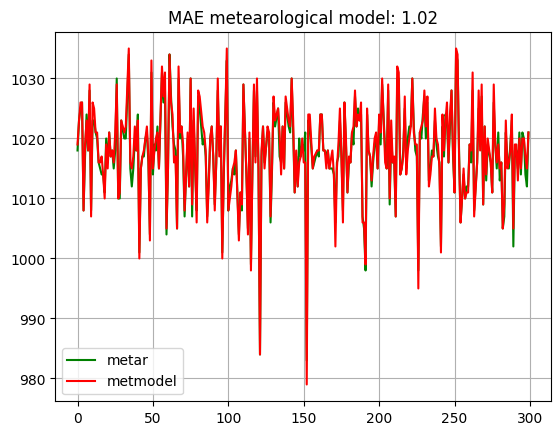

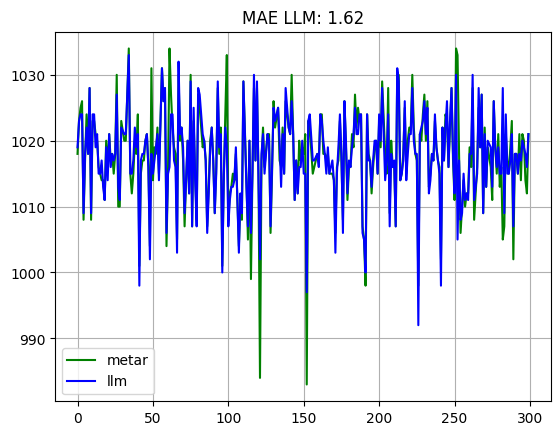

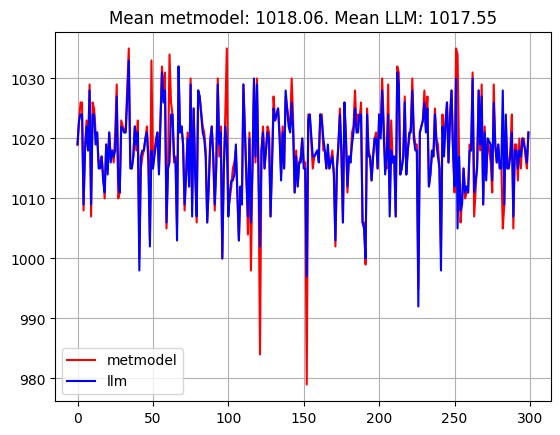

In [4]:
#@title QNH check

import pandas as pd
import numpy as np
pd.options.display.max_rows = 999

score = []

def flatten_list(list_s):
  numbers = []
  for sublist in list_s:
      for item in sublist:
          # Check if the string after 'q' is not empty
          if len(item) > 1:
              num = item[1:]
              if num.isdigit():
                  numbers.append(int(num))


  return np.array(numbers)

df = pd.read_csv(result_path)
q_ytest = []
q_ypred = []
q_metmod =[]
for i in range(0,len(df)):
  q_ytest.append([word for word in df["y_test"][i].split() if 'q' in word.lower()])
  q_ypred.append([word for word in df["y_pred"][i].split() if 'q' in word.lower()][:1])
  q_metmod.append([word for word in df["all"][i].split() if 'q' in word.lower()][:1])

q_ypred_f = []

for sublist in q_ypred:
    if not sublist:  # Check if the sublist is empty
        q_ypred_f.append(["q0000"])
    else:
        q_ypred_f.append(sublist)  # Append the single string element


q_ypred_n = flatten_list(q_ypred_f)
q_test_n = flatten_list(q_ytest)
q_metmod_n = flatten_list(q_metmod)


#Show results
df_res = pd.DataFrame({"metar":q_test_n,"metmodel":q_metmod_n,"llm":q_ypred_n})

#avoid 0
df_res = df_res[df_res.llm!=0]
mae_llm = round((df_res['metar'] - df_res['llm']).abs().mean(),2)
mae_metmod = round(np.mean(np.abs(q_metmod_n - q_test_n)),2)

score.append(mae_llm)
score.append(mae_metmod)

df_res[["metar","metmodel"]].plot(grid=True, color=['green', 'red'],title="MAE metearological model: {}".format(mae_metmod));
df_res[["metar","llm"]].plot(grid=True, color=['green', 'blue'],title="MAE LLM: {}".format(mae_llm));
df_res[["metmodel","llm"]].plot(grid=True, color=['red', 'blue'],title="Mean metmodel: {}. Mean LLM: {}".format(round(q_metmod_n.mean(),2),round(df_res.llm.mean(),2)));

In [5]:
#@title wind check

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.options.display.max_rows = 999

def contains_vrb(column):
    return column.str.contains('VRB', case=False, na=False)

def detect_wind_variation_test(metar):
    # Define a regex pattern for wind direction variation
    wind_variation_pattern = r'\b(\d{3})V(\d{3})\b'

    # Search for the wind direction variation in the METAR report
    match = re.search(wind_variation_pattern, metar)
    if match:
        dir1 = match.group(1)
        dir2 = match.group(2)
        return dir1,dir2
    else:
        return -1,-1

def detect_wind_variation_llm(metar):
    # Define a regex pattern for wind direction variation
    wind_variation_pattern = r'\b(\d{3})v(\d{3})\b'

    # Search for the wind direction variation in the METAR report
    match = re.search(wind_variation_pattern, metar)
    if match:
        dir1 = match.group(1)
        dir2 = match.group(2)
        return dir1,dir2
    else:
        return -1,-1


# Function to extract wind direction, speed, and gusts
def extract_wind_llm(metar):
    # Define a regex pattern for wind direction, intensity, and gusts
    # Also include a pattern for variable wind direction (VRB)
    wind_pattern = r'\b(vrb|\d{3})(\d{2})(g\d{2})?kt\b'

    # Search for the wind information in the METAR report
    match = re.search(wind_pattern, metar)
    if match:
        wind_direction = match.group(1)
        wind_speed = match.group(2)
        wind_gust = match.group(3) if match.group(3) else 0
        return wind_direction, wind_speed, wind_gust
    else:
        return "Wind information not found"


def extract_wind_test(metar):
    # Define a regex pattern for wind direction, intensity, and gusts
    # Also include a pattern for variable wind direction (VRB)
    wind_pattern = r'\b(VRB|\d{3})(\d{2})(G\d{2})?KT\b'

    # Search for the wind information in the METAR report
    match = re.search(wind_pattern, metar)
    if match:
        wind_direction = match.group(1)
        wind_speed = match.group(2)
        wind_gust = match.group(3) if match.group(3) else 0
        return wind_direction, wind_speed, wind_gust
    else:
        return "Wind information not found"

dirtest, modtest, gtest =[],[],[]
dirllm, modllm, gllm =[],[],[]

df = pd.read_csv(result_path)

for i in range(0,len(df)):
  wind_info_test = extract_wind_test(df["y_test"][i])
  wind_info_llm = extract_wind_llm(df["y_pred"][i])

  if isinstance(wind_info_test, tuple):
    dir, mod, gust = wind_info_test
    dirtest.append(dir)
    modtest.append(mod)
    gtest.append(gust)

  else:
    print(wind_info_test)
    dirtest.append(np.nan)
    modtest.append(np.nan)
    gtest.append(np.nan)

  if isinstance(wind_info_llm, tuple):
    dir, mod, gust = wind_info_llm
    dirllm.append(dir)
    modllm.append(mod)
    gllm.append(gust)

  else:
    print(wind_info_llm,i)
    dirllm.append(np.nan)
    modllm.append(np.nan)
    gllm.append(np.nan)

df["dirtest"]=dirtest
df["modtest"]=modtest
df["gtest"]=gtest

df["dirllm"]=dirllm
df["modllm"]=modllm
df["gllm"]=gllm

for i in range(0,len(df)):
  if "G" in str(df['gtest'][i]):
    df["gtest"][i]= int(df['gtest'][i][1:])

for i in range(0,len(df)):
  if "g" in str(df['gllm'][i]):
    df["gllm"][i]= int(df['gllm'][i][1:])

dirmetmod =[]
for i in range(0,len(df)):
  dirmetmod.append(int(df["all"][i].split()[0][:3]))
df["dirmetmod"] = dirmetmod

modmetmod =[]
for i in range(0,len(df)):
  modmetmod.append(int(df["all"][i].split()[0][3:5]))
df["modmetmod"] = modmetmod

dirvar = []
for i in range(0,len(df)):
  dirvar.append(detect_wind_variation_test(df["y_test"][i]))
df["dirvartest"] = dirvar

dirvar = []
for i in range(0,len(df)):
  dirvar.append(detect_wind_variation_llm(df["y_pred"][i]))
df["dirvarllm"] = dirvar
df.set_index("time")

#Analytics
mask_dirtest = contains_vrb(df['dirtest'])
mask_dirllm = contains_vrb(df['dirllm'])

# Combine the masks to filter rows
df_dir = df[~(mask_dirtest | mask_dirllm)][["dirtest","dirllm","dirmetmod"]].dropna().astype(int)

mae = int(np.mean(np.abs(df_dir['dirtest'] - df_dir['dirmetmod'])))
print(f"Mean Absolute Error (degrees) wind direction metmodel and metar: {mae}")
score.append(mae)
#MAE dir no vrb llm metar
mae = int((np.mean(np.abs(df_dir['dirtest'] - df_dir['dirllm']))))
print(f"Mean Absolute Error (degrees) wind direction llm and metar: {mae}")
score.append(mae)
df_mod= df[['modmetmod',"modtest","modllm"]].dropna().astype(int)

mae = round(np.mean(np.abs(df_mod['modtest'] - df_mod['modmetmod'])),2)
print(f"Mean Absolute Error (Kt) wind intensity metmodel and metar: {mae}")
score.append(mae)

#MAE dir no vrb llm metar
mae = round(np.mean(np.abs(df_mod['modtest'] - df_mod['modllm'])),2)
print(f"Mean Absolute Error (kt) wind intensity llm and metar: {mae}")
score.append(mae)

dirvary = sum([1 if (df["dirvarllm"][c][0]!=-1) & (df["dirvartest"][c][0]!=-1) else 0 for c in range(0,len(df))])
dirvarn = sum([1 if (df["dirvarllm"][c][0]==-1) & (df["dirvartest"][c][0]==-1) else 0 for c in range(0,len(df))])
print("Both metar and forecast direction variation:", round(dirvary/len(df),2))
print("Both metar and forecast no direction variation:",round(dirvarn/len(df),2))
print("No match between metar and forecast:", round((len(df)-dirvary-dirvarn)/len(df),2))

display(df.set_index("time")[["dirtest","dirllm","dirmetmod","dirvartest","dirvarllm", "modtest",	"modmetmod","modllm","gtest","gllm"]].head(20))

Mean Absolute Error (degrees) wind direction metmodel and metar: 67
Mean Absolute Error (degrees) wind direction llm and metar: 51
Mean Absolute Error (Kt) wind intensity metmodel and metar: 2.93
Mean Absolute Error (kt) wind intensity llm and metar: 2.55
Both metar and forecast direction variation: 0.45
Both metar and forecast no direction variation: 0.19
No match between metar and forecast: 0.36


,dirtest,dirllm,dirmetmod,dirvartest,dirvarllm,modtest,modmetmod,modllm,gtest,gllm
time,,,,,,,,,,
2019-01-24 00:00:00,330,230,310,"(-1, -1)","(190, 280)",11,13,06,0,0
2021-02-12 14:00:00,240,190,190,"(200, 290)","(120, 260)",05,9,12,0,23
2018-01-31 08:00:00,VRB,vrb,100,"(-1, -1)","(-1, -1)",02,1,02,0,0
2021-09-21 02:00:00,030,030,20,"(320, 100)","(340, 130)",04,9,04,0,0
2022-12-05 08:00:00,240,200,80,"(200, 280)","(170, 230)",05,7,08,0,0
2019-09-01 19:00:00,030,010,20,"(350, 100)","(-1, -1)",12,15,08,0,0
2020-10-30 22:00:00,220,220,140,"(-1, -1)","(-1, -1)",06,5,05,0,0
2020-07-23 06:00:00,VRB,vrb,330,"(-1, -1)","(-1, -1)",01,3,02,0,0
2021-03-14 17:00:00,360,340,300,"(320, 070)","(300, 020)",05,11,04,0,0


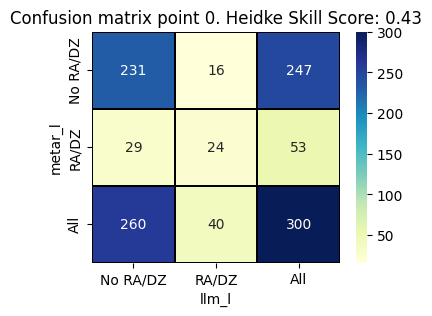

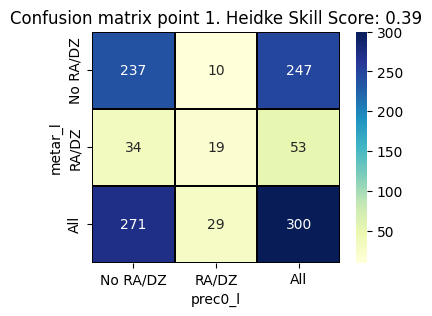

In [6]:
#@title Precipitation check

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 100)
df = pd.read_csv(result_path)

df["metar_l"] = "No RA/DZ"
mask = df['y_test'].str.contains("RA")
df.loc[mask,["metar_l"]] = "RA/DZ"
mask = df['y_test'].str.contains("DZ")
df.loc[mask,["metar_l"]] = "RA/DZ"

df["llm_l"] = "No RA/DZ"
mask = df['y_pred'].str.contains("ra")
df.loc[mask,["llm_l"]] = "RA/DZ"
mask = df['y_pred'].str.contains("dz")
df.loc[mask,["llm_l"]] = "RA/DZ"

df["prec0_l"] = "No RA/DZ"
mask = df['all'].str.contains("prec0y")
df.loc[mask,["prec0_l"]] = "RA/DZ"

# Confussion matrix and Heidke skill score
cm0 = pd.crosstab(df.metar_l, df.llm_l,margins=True)
a = cm0.values[0,0]
b = cm0.values[1,0]
c = cm0.values[0,1]
d = cm0.values[1,1]
HSS0 = round(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)),2)
score.append(HSS0)

cm1 = pd.crosstab(df.metar_l, df.prec0_l,margins=True)
a = cm1.values[0,0]
b = cm1.values[1,0]
c = cm1.values[0,1]
d = cm1.values[1,1]
HSS1 = round(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)),2)
score.append(HSS1)

plt.figure(figsize=(4, 3))
plt.title("Confusion matrix point 0. Heidke Skill Score: {}".format(HSS0))
seab0 = sns.heatmap(cm0,annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.2,linecolor='black');
plt.show()

plt.figure(figsize=(4, 3))
plt.title("Confusion matrix point 1. Heidke Skill Score: {}".format(HSS1))
seab1 = sns.heatmap(cm1,annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.2,linecolor='black');
plt.show()


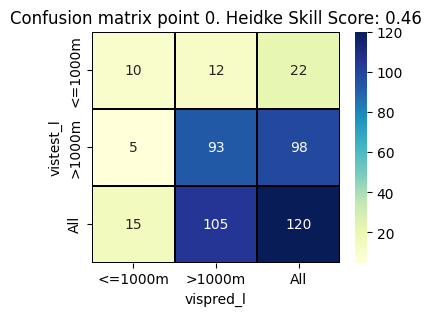

In [7]:
#@title Visibility check

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 999

def extract_visibility(metar):
    # Check if 'CAVOK' is in the METAR report
    if 'CAVOK' in metar:
        return '9999'
    if "cavok" in metar:
        return "9999"
    # Define a regex pattern for visibility
    visibility_pattern = r'\b(\d{4}|(\d+/\d+)?SM)\b'

    # Search for the visibility in the METAR report
    match = re.search(visibility_pattern, metar)
    if match:
        return int(match.group(0))
    else:
        return "Visibility information not found"

df = pd.read_csv(result_path)

vistest = []
vispred = []
for i in range(0,len(df)):
  vistest.append(extract_visibility(df["y_test"][i]))
  vispred.append(extract_visibility(df["y_pred"][i]))

df["vistest"]= vistest
df["vispred"]= vispred
df[['y_test', 'y_pred', 'all', 'vistest', 'vispred']]


#visibility to interval
interval = pd.IntervalIndex.from_tuples([(-0.1,1000), (1000, 40000)])
labels = ['<=1000m', '>1000m']
df["vistest_l"] = pd.cut(df["vistest"], bins=interval,retbins=False,
                        labels=labels).map({a:b for a,b in zip(interval,labels)}).astype("category")
df["vispred_l"] = pd.cut(df["vispred"], bins=interval,retbins=False,
                        labels=labels).map({a:b for a,b in zip(interval,labels)}).astype("category")

cm0 = pd.crosstab(df.vistest_l, df.vispred_l,margins=True)
a = cm0.values[0,0]
b = cm0.values[1,0]
c = cm0.values[0,1]
d = cm0.values[1,1]
HSS0 = round(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)),2)
score.append(HSS0)

plt.figure(figsize=(4, 3))
plt.title("Confusion matrix point 0. Heidke Skill Score: {}".format(HSS0))
seab0 = sns.heatmap(cm0,annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.2,linecolor='black');
plt.show()

In [8]:
#@title Temperature check

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def extract_temperature_test(metar):
    # Define a regex pattern to match the temperature (TT/DD)
    temperature_pattern = r'\b(M?\d{2})/(M?\d{2})\b'

    # Search for the temperature pattern in the METAR report
    match = re.search(temperature_pattern, metar)
    if match:
        temperature = match.group(1)
        if 'M' in temperature:
            temperature = -int(temperature.replace('M', ''))
        else:
            temperature = int(temperature)
        return temperature
    else:
        return None


def extract_temperature_llm(metar):
    # Define a regex pattern to match the temperature (TT/DD)
    temperature_pattern = r'\b(m?\d{2}) (m?\d{2})\b'

    # Search for the temperature pattern in the METAR report
    match = re.search(temperature_pattern, metar)
    if match:
        temperature = match.group(1)
        if 'm' in temperature:
            temperature = -int(temperature.replace('m', ''))
        else:
            temperature = int(temperature)
        return temperature
    else:
        return None


templlm,tempmetar,tempmetmod, tempmetmodraw =[],[],[],[]
for i in range (0,len(df)):
  tempmetar.append(extract_temperature_test(df["y_test"][i]))
  templlm.append(extract_temperature_llm(df["y_pred"][i]))
  tempmetmodraw.append(df["all"][i].split()[5])

tempmetmod = [-int(temperature.replace('M', '')) if 'M' in temperature else int(temperature) for temperature in tempmetmodraw]
df_temp=pd.DataFrame({"tempmetar":tempmetar,"templlm":templlm,"tempmetmod":tempmetmod}).dropna()


mae = round(np.mean(np.abs(df_temp['tempmetar'] - df_temp['tempmetmod'])),2)
std = round((df_temp['tempmetar'] - df_temp['tempmetmod']).std(),2)
print(f"Mean Absolute Error (degrees) temperature metmodel and metar: {mae}")
print(f"Standard desviation differences (degrees) temperature metmodel and metar: {std}")
score.append(mae)
score.append(std)

#MAE dir no vrb llm metar
mae = round(np.mean(np.abs(df_temp['tempmetar'] - df_temp['templlm'])),2)
std = round((df_temp['tempmetar'] - df_temp['templlm']).std(),2)
print(f"Mean Absolute Error temperature (degreees) llm and metar: {mae}")
print(f"Standard desviation differences (degrees) temperature LLM and metar: {std}")
score.append(mae)
score.append(std)
df_temp.head(20)

Mean Absolute Error (degrees) temperature metmodel and metar: 1.42
Standard desviation differences (degrees) temperature metmodel and metar: 1.82
Mean Absolute Error temperature (degreees) llm and metar: 1.5
Standard desviation differences (degrees) temperature LLM and metar: 1.98


,tempmetar,templlm,tempmetmod
0,12,12.0,11
1,14,15.0,14
2,5,6.0,6
3,15,14.0,14
4,6,8.0,9
5,19,18.0,18
6,14,13.0,13
7,18,18.0,16
8,14,13.0,12
9,19,15.0,18


In [9]:
#@title Save score

df_score = pd.DataFrame(score,index=["MAE_QNH_llm","MAE_QNH_metmodel","MAE_dir_metmodel",
                          "MAE_dir_llm","MAE_wind_int_metmodel","MAE_wind_int_llm",
                          "HSS_prec_llm","HSS_prec_metmodel","HHS_vis_llm","MAE_temp_metmodel","Std_temp_diff_metmodel",
                          "MAE_temp_llm","Std_temp_diff_metmodel"], columns=["Score"])
score_path = "/content/drive/MyDrive/Colab Notebooks/gpt/LEVX/LEVXscore1.csv"
df_score.to_csv(score_path)

In [10]:
df_score

,Score
MAE_QNH_llm,1.62
MAE_QNH_metmodel,1.02
MAE_dir_metmodel,67.00
MAE_dir_llm,51.00
MAE_wind_int_metmodel,2.93
MAE_wind_int_llm,2.55
HSS_prec_llm,0.43
HSS_prec_metmodel,0.39
HHS_vis_llm,0.46
MAE_temp_metmodel,1.42
